In [1]:
!git clone https://github.com/SomersInias/AI-PromptInsights

Cloning into 'AI-PromptInsights'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 80 (delta 16), reused 38 (delta 8), pack-reused 32 (from 1)
Receiving objects: 100% (80/80), 160.16 MiB | 15.85 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (12/12), done.


In [2]:
!unzip /content/AI-PromptInsights/data/diffusion_prompts.csv.zip -d /content/extracted_data

Archive:  /content/AI-PromptInsights/data/diffusion_prompts.csv.zip
  inflating: /content/extracted_data/diffusion_prompts.csv  


In [3]:
!unzip /content/AI-PromptInsights/data/RandomUsers_prompts.zip -d /content/extracted_data

Archive:  /content/AI-PromptInsights/data/RandomUsers_prompts.zip
  inflating: /content/extracted_data/RandomUsers_prompts.csv  


In [ ]:
import pandas as pd

# Replace 'prompts.csv' with csv needed
df = pd.read_csv("/content/extracted_data/diffusion_prompts.csv")

# Display the first few rows of the DataFrame
df.head()

Unnamed: 0                                    id  \
0           0  00000d0e-45cb-47b6-9f72-6a481e940d78   
1           1  00001a8f-993f-4d69-8fd2-f7d69dc1e8ef   
2           2  00002cfc-8170-4a93-a1f8-aa5681cb5f71   
3           3  00004467-fdef-41bc-bc73-20c68444a024   
4           4  000044ca-a4d7-46a2-81da-7ef3bf4cbeeb   

                                              prompt  \
0  man waking up, dark and still room, cinematic ...   
1  Yate con familia feliz navegando por el mar ca...   
2  Many friendly alien race individuals. fantasy,...   
3  theo james as cyclops, cyberpunk futuristic ne...   
4  Portrait of a beautiful woman with long hair o...   

                                                 url  width  height  \
0  https://krea-prod-v1-generations.s3.us-east-1....    512     512   
1  https://image.lexica.art/full_jpg/00001a8f-993...    640     640   
2  https://image.lexica.art/full_jpg/00002cfc-817...    512     768   
3  https://image.lexica.art/full_jpg/00004467-fde...    512     768   
4  https://image.lexica.art/full_jpg/000044ca-a4d...    512     768   

              source_site  
0  stablediffusionweb.com  
1              lexica.art  
2              lexica.art  
3              lexica.art  
4              lexica.art

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'prompt', 'url', 'width', 'height', 'source_site'], dtype='object')

In [ ]:
df

Unnamed: 0                                    id  \
0                0  00000d0e-45cb-47b6-9f72-6a481e940d78   
1                1  00001a8f-993f-4d69-8fd2-f7d69dc1e8ef   
2                2  00002cfc-8170-4a93-a1f8-aa5681cb5f71   
3                3  00004467-fdef-41bc-bc73-20c68444a024   
4                4  000044ca-a4d7-46a2-81da-7ef3bf4cbeeb   
...            ...                                   ...   
907948      907948  ffffb475-b215-4cca-b830-080c3e25d6e3   
907949      907949  ffffb860-c2ec-466d-abb0-1378046dc953   
907950      907950  ffffbdd9-1671-45e0-86b1-6408c694d89f   
907951      907951  ffffe215-c54d-4e2d-be2a-b2a1e8ed5e98   
907952      907952  fffff9d3-fe3a-443c-b1da-5701e19ed847   

                                                   prompt  \
0       man waking up, dark and still room, cinematic ...   
1       Yate con familia feliz navegando por el mar ca...   
2       Many friendly alien race individuals. fantasy,...   
3       theo james as cyclops, cyberpunk futuristic ne...   
4       Portrait of a beautiful woman with long hair o...   
...                                                   ...   
907948  Portrait of an old sad woman eating a bagel, i...   
907949               Harry Potter Kisses Hermione Granger   
907950                landfill with an light angel on top   
907951  Corporate Book Cover Design Template in A4. Ca...   
907952  ad for a sailing boat with dark haired woman o...   

                                                      url  width  height  \
0       https://krea-prod-v1-generations.s3.us-east-1....    512     512   
1       https://image.lexica.art/full_jpg/00001a8f-993...    640     640   
2       https://image.lexica.art/full_jpg/00002cfc-817...    512     768   
3       https://image.lexica.art/full_jpg/00004467-fde...    512     768   
4       https://image.lexica.art/full_jpg/000044ca-a4d...    512     768   
...                                                   ...    ...     ...   
907948  https://image.lexica.art/full_jpg/ffffb475-b21...    512     768   
907949  https://image.lexica.art/full_jpg/ffffb860-c2e...    512     768   
907950  https://krea-prod-v1-generations.s3.us-east-1....    512     512   
907951  https://image.lexica.art/full_jpg/ffffe215-c54...   1024    1536   
907952  https://image.lexica.art/full_jpg/fffff9d3-fe3...    512     768   

                   source_site  
0       stablediffusionweb.com  
1                   lexica.art  
2                   lexica.art  
3                   lexica.art  
4                   lexica.art  
...                        ...  
907948              lexica.art  
907949              lexica.art  
907950  stablediffusionweb.com  
907951              lexica.art  
907952              lexica.art  

[907953 rows x 7 columns]

In [ ]:
# checking missing values
print(df.isnull().sum())

Unnamed: 0     0
id             0
prompt         2
url            0
width          0
height         0
source_site    0
dtype: int64


In [ ]:
# Drop rows where the 'prompt' column has missing values
df = df.dropna(subset=['prompt'])

# Verify that the missing values have been removed
print(df.isnull().sum())

Unnamed: 0     0
id             0
prompt         0
url            0
width          0
height         0
source_site    0
dtype: int64


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from collections import Counter

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Combine all prompts into one large string
all_prompts = " ".join(df['prompt'].dropna().iloc[:9000]) #change Iloc to number of prompts wanted to analyse

# Set the maximum length for spaCy
nlp.max_length = 150_000_000  # Increase as needed

# Process the text with spaCy
doc = nlp(all_prompts)

# Filter tokens: remove stopwords, punctuation, and short tokens
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and len(token.text) > 2]

# Count word frequencies
word_freq = Counter(tokens)

# Display the 20 most common words
most_common_words = word_freq.most_common(20)
print("Most Common Words in Prompts:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most Common Words in Prompts:
art: 2390
detailed: 2230
artstation: 1174
style: 1132
painting: 1097
portrait: 1078
highly: 1075
digital: 916
lighting: 892
realistic: 868
beautiful: 835
intricate: 832
white: 792
black: 785
concept: 758
greg: 755
sharp: 747
render: 736
trending: 705
focus: 701


In [ ]:
# Display the x most common words
most_common_words = word_freq.most_common(30)
print("Most Common Words in Prompts:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most Common Words in Prompts:
art: 2390
detailed: 2230
artstation: 1174
style: 1132
painting: 1097
portrait: 1078
highly: 1075
digital: 916
lighting: 892
realistic: 868
beautiful: 835
intricate: 832
white: 792
black: 785
concept: 758
greg: 755
sharp: 747
render: 736
trending: 705
focus: 701
illustration: 676
rutkowski: 670
hair: 659
cinematic: 633
high: 606
background: 598
face: 587
fantasy: 541
anime: 511
body: 501


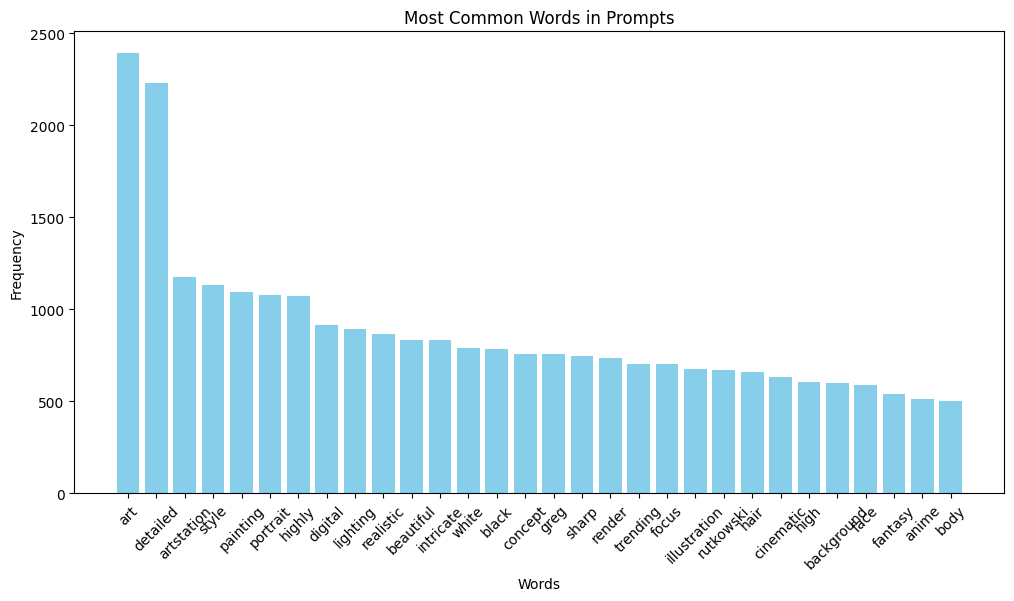

In [ ]:
import matplotlib.pyplot as plt

# Unpack the most common words and their frequencies
words, frequencies = zip(*most_common_words)

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title("Most Common Words in Prompts")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from collections import Counter

# Extract entities from the first x prompts
entities = []
for prompt in df['prompt'].dropna().iloc[:9000]:
    doc = nlp(prompt)
    entities.extend([(ent.text, ent.label_) for ent in doc.ents])

# Count the most common entities by type
entity_counter = Counter(entities)
print("Most Common Entities:")
for entity, count in entity_counter.most_common(100):
    print(f"{entity[0]} ({entity[1]}): {count}")

Most Common Entities:
greg rutkowski (PERSON): 523
8k (CARDINAL): 487
8 (CARDINAL): 385
4k (CARDINAL): 253
3d (CARDINAL): 206
4 (CARDINAL): 179
5 (CARDINAL): 156
3 (CARDINAL): 114
Greg Rutkowski (PERSON): 100
two (CARDINAL): 91
wlop (ORG): 89
night (TIME): 82
one (CARDINAL): 70
kuvshinov (GPE): 69
2 (CARDINAL): 69
WLOP (ORG): 65
8k (DATE): 63
sci-fi (ORG): 60
un (ORG): 56
thirds (CARDINAL): 51
2d (CARDINAL): 49
Artgerm (GPE): 44
james gilleard (PERSON): 43
half (CARDINAL): 41
Depth (PERSON): 38
james jean (PERSON): 38
Alphonse Mucha (PERSON): 37
japanese (NORP): 37
Japanese (NORP): 34
90 (DATE): 33
creepy (NORP): 32
tom bagshaw (PERSON): 32
lois van baarle (PERSON): 31
35mm (QUANTITY): 31
400 (CARDINAL): 30
three (CARDINAL): 29
stanley artgerm lau (ORG): 29
winter (DATE): 29
ArtStation (ORG): 28
french (NORP): 28
akira toriyama (PERSON): 28
charlie bowater (PERSON): 26
krenz cushart (PERSON): 26
80s (DATE): 26
stephen bliss (PERSON): 25
russian (NORP): 25
1 (CARDINAL): 25
craig mullins

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

# Select the first 9000 prompts, ensuring there are no missing values
prompts = df['prompt'].dropna().iloc[:9000]

# Apply sentiment analysis to each prompt
df['sentiment'] = prompts.apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the sentiment scores for the first 10 prompts
print(df['sentiment'].head(10))

# Calculate the average sentiment score of the first 9000 prompts
average_sentiment = df['sentiment'].mean()
print(f"Average Sentiment of the first 9000 prompts: {average_sentiment}")

0    0.020833
1    0.000000
2    0.079167
3    0.233333
4    0.400000
5    0.100000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: sentiment, dtype: float64
Average Sentiment of the first 9000 prompts: 0.08807210434500237


<ipython-input-20-24e97213941e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = prompts.apply(lambda x: TextBlob(x).sentiment.polarity)


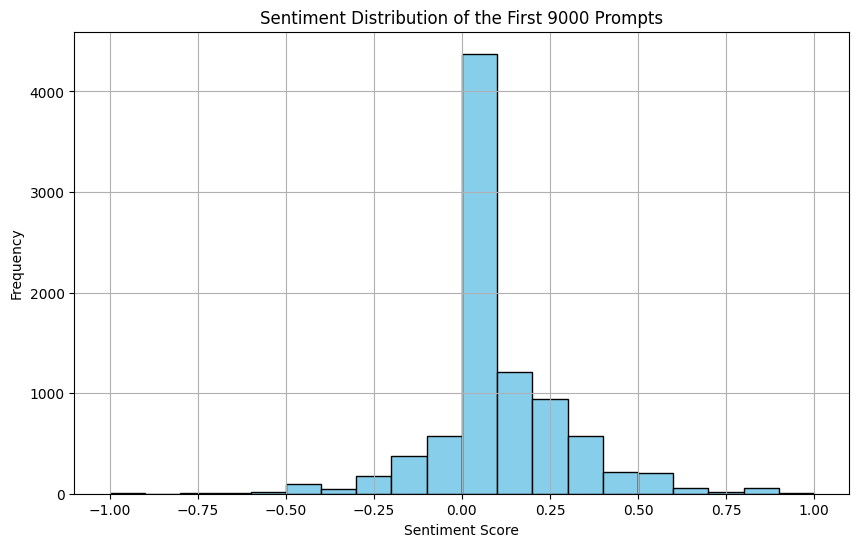

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title("Sentiment Distribution of the First 9000 Prompts")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#test code

In [ ]:
import pandas as pd
import random

# Load the dataset
df = pd.read_csv("/content/extracted_data/diffusion_prompts.csv")

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the number of users needed
num_users = len(df) // 10000 + (1 if len(df) % 10000 != 0 else 0)

# Create userId column
user_ids = []
user_id = 1
remaining_rows = len(df)

while remaining_rows > 0:
    # Assign approximately 10,000 prompts to each user
    prompts_for_user = min(10000 + random.randint(-2000, 2000), remaining_rows)
    user_ids.extend([user_id] * prompts_for_user)
    remaining_rows -= prompts_for_user
    user_id += 1

# Add userId column to DataFrame
df['userId'] = user_ids

# Save the new DataFrame to a CSV file
df.to_csv("/content/extracted_data/randomized_prompts_with_users.csv", index=False)

print(f"Data randomized and saved! Total users created: {user_id - 1}")

Data randomized and saved! Total users created: 91


In [ ]:
# Replace 'prompts.csv' with csv needed
df = pd.read_csv("/content/extracted_data/randomized_prompts_with_users.csv")

# Display the first few rows of the DataFrame
df.head()

Unnamed: 0                                    id  \
0      829140  e99f104e-7e5f-4b0a-99b4-9ae269ff065b   
1      705164  c6908fc0-2ba4-4769-b7de-fdf1559628d4   
2      769475  d8c30204-8370-4361-9003-2cb3d0143975   
3      442785  7c8df9ee-780e-4f52-8c80-af94a7daea06   
4      332497  5d622845-a3ab-4d93-bc17-41493d667af7   

                                              prompt  \
0  robot revolutionary speaking to a crowd of rob...   
1                       smiling cute sexy anime girl   
2  CUTE AND ADORABLE CARTOON FLUFFY PUPPY, SPACE,...   
3  Beautiful black man with white beard wearing w...   
4  3d portrait of  profesional photographer in 20...   

                                                 url  width  height  \
0  https://krea-prod-v1-generations.s3.us-east-1....    512     512   
1  https://image.lexica.art/full_jpg/c6908fc0-2ba...    512     768   
2  https://image.lexica.art/full_jpg/d8c30204-837...    512     768   
3  https://image.lexica.art/full_jpg/7c8df9ee-780...    512     768   
4  https://image.lexica.art/full_jpg/04a758a9-746...    512     768   

              source_site  userId  
0  stablediffusionweb.com       1  
1              lexica.art       1  
2              lexica.art       1  
3              lexica.art       1  
4              lexica.art       1

In [ ]:
# Count unique userIds
unique_user_ids = df['userId'].nunique()

print(f"Total unique userIds: {unique_user_ids}")

Total unique userIds: 91


In [ ]:
from google.colab import files
files.download('/content/extracted_data/randomized_prompts_with_users.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_csv('/content/extracted_data/randomized_prompts_with_users.csv', index=False, encoding='utf-8')
from google.colab import files
files.download('/content/extracted_data/randomized_prompts_with_users.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Count the number of prompts each user has
user_prompt_counts = df['userId'].value_counts()

# Print the counts for each userId
print("Number of prompts per userId:")
print(user_prompt_counts)

Number of prompts per userId:
userId
2     11969
64    11963
20    11947
71    11915
62    11851
      ...  
22     8144
27     8137
1      8112
73     8030
56     8011
Name: count, Length: 90, dtype: int64


In [ ]:
import spacy
from collections import Counter
import pandas as pd

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Set the maximum length for spaCy
nlp.max_length = 150_000_000  # Increase as needed

# Function to analyze prompts for a given userId
def analyze_user_prompts(user_id, df):
    # Filter prompts for the specific userId
    user_prompts = df[df['userId'] == user_id]['prompt'].dropna()

    # Combine all prompts into one large string
    all_prompts = " ".join(user_prompts)

    # Process the text with spaCy
    doc = nlp(all_prompts)

    # Filter tokens: remove stopwords, punctuation, and short tokens
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and len(token.text) > 2]

    # Count word frequencies
    word_freq = Counter(tokens)

    return word_freq



In [ ]:
# Example usage:
# Load your dataset
df = pd.read_csv("/content/extracted_data/randomized_prompts_with_users.csv")



In [ ]:
# Call the function for a specific userId (e.g., userId = 1)
user_id = 20  # replace with any userId you want to analyze
word_freq = analyze_user_prompts(user_id, df)

# Now you can sort and choose how many words to print
# Sort the word frequencies in descending order
sorted_word_freq = word_freq.most_common()

# Print the most common words (custom number)
top_words = 20  # Change this number to how many words you want to print
print(f"Most Common Words for userId {user_id}:")
for word, freq in sorted_word_freq[:top_words]:
    print(f"{word}: {freq}")

Most Common Words for userId 20:
art: 3258
detailed: 2933
style: 1686
artstation: 1602
painting: 1566
highly: 1427
portrait: 1400
digital: 1233
lighting: 1212
realistic: 1184
intricate: 1112
black: 1090
white: 1075
sharp: 1046
beautiful: 1041
greg: 1025
trending: 999
concept: 985
hair: 958
render: 950


In [ ]:
# Call the function for a specific userId (e.g., userId = 1)
user_id = 50  # replace with any userId you want to analyze
word_freq = analyze_user_prompts(user_id, df)

# Now you can sort and choose how many words to print
# Sort the word frequencies in descending order
sorted_word_freq = word_freq.most_common()

# Print the most common words (custom number)
top_words = 100  # Change this number to how many words you want to print
print(f"Most Common Words for userId {user_id}:")
for word, freq in sorted_word_freq[:top_words]:
    print(f"{word}: {freq}")

Most Common Words for userId 50:
art: 2737
detailed: 2487
style: 1431
artstation: 1390
painting: 1306
portrait: 1207
highly: 1186
realistic: 1070
digital: 1040
lighting: 1015
intricate: 1004
sharp: 923
black: 918
beautiful: 893
trending: 885
concept: 872
greg: 842
white: 833
focus: 825
render: 797
hair: 775
illustration: 746
cinematic: 722
rutkowski: 715
background: 712
high: 687
face: 622
body: 616
fantasy: 591
photo: 587
octane: 556
girl: 547
anime: 545
wearing: 538
light: 527
eyes: 524
artgerm: 522
woman: 522
man: 521
dark: 507
cute: 499
hyper: 474
design: 466
colors: 464
blue: 463
smooth: 459
ultra: 444
unreal: 425
elegant: 422
red: 398
details: 398
engine: 396
shot: 376
detail: 344
photorealistic: 332
studio: 330
long: 329
color: 319
mucha: 317
cyberpunk: 312
character: 310
logo: 308
old: 305
alphonse: 296
city: 285
quality: 276
young: 273
futuristic: 271
photography: 264
green: 262
masterpiece: 256
space: 251
james: 246
volumetric: 243
oil: 241
soft: 228
dramatic: 226
forest: 224

In [ ]:
# Call the function for a specific userId (e.g., userId = 1)
user_id = 10  # replace with any userId you want to analyze
word_freq = analyze_user_prompts(user_id, df)

# Now you can sort and choose how many words to print
# Sort the word frequencies in descending order
sorted_word_freq = word_freq.most_common()

# Print the most common words (custom number)
top_words = 100  # Change this number to how many words you want to print
print(f"Most Common Words for userId {user_id}:")
for word, freq in sorted_word_freq[:top_words]:
    print(f"{word}: {freq}")

Most Common Words for userId 10:
art: 2925
detailed: 2807
style: 1566
artstation: 1440
portrait: 1343
highly: 1339
painting: 1335
lighting: 1202
digital: 1141
realistic: 1125
intricate: 1066
black: 1027
white: 983
beautiful: 965
sharp: 945
greg: 939
trending: 885
render: 882
concept: 868
focus: 854
background: 841
illustration: 838
rutkowski: 811
hair: 804
cinematic: 784
high: 756
face: 667
fantasy: 619
body: 605
wearing: 602
octane: 596
eyes: 591
anime: 588
photo: 576
light: 573
woman: 558
man: 555
dark: 551
artgerm: 547
girl: 540
blue: 510
design: 496
hyper: 494
cute: 489
smooth: 480
details: 472
unreal: 472
elegant: 465
colors: 462
ultra: 460
engine: 439
red: 429
shot: 391
logo: 380
color: 373
old: 371
long: 362
studio: 355
detail: 345
character: 339
cyberpunk: 335
mucha: 324
photorealistic: 322
city: 320
futuristic: 307
masterpiece: 305
alphonse: 300
photography: 299
quality: 286
volumetric: 283
dramatic: 282
green: 280
space: 274
young: 266
vintage: 249
james: 249
skin: 246
cartoo

In [ ]:
import matplotlib.pyplot as plt

def plot_word_frequencies(sorted_word_freq, top_n=10):
    """
    Plots the top N word frequencies.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 10).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()  # Adjust layout to avoid clipping

    # Show the plot
    plt.show()



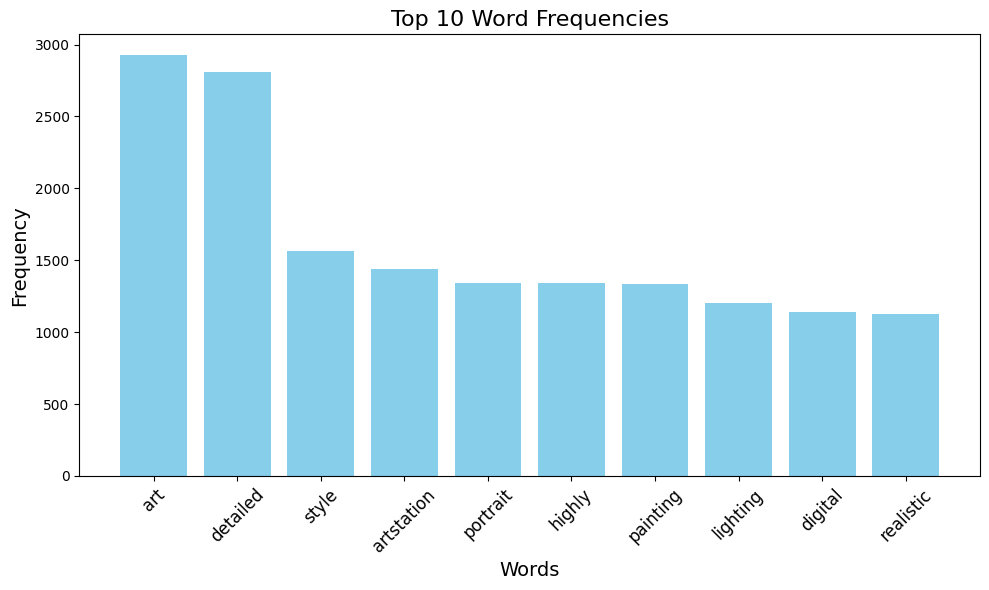

In [ ]:
# Example usage:
# Assuming sorted_word_freq contains the sorted word frequencies
# sorted_word_freq = word_freq.most_common()

top_n_to_plot = 10  # Change this to plot a different number of words
plot_word_frequencies(sorted_word_freq, top_n=top_n_to_plot)

In [ ]:
print(sorted_word_freq)

[('art', 2925), ('detailed', 2807), ('style', 1566), ('artstation', 1440), ('portrait', 1343), ('highly', 1339), ('painting', 1335), ('lighting', 1202), ('digital', 1141), ('realistic', 1125), ('intricate', 1066), ('black', 1027), ('white', 983), ('beautiful', 965), ('sharp', 945), ('greg', 939), ('trending', 885), ('render', 882), ('concept', 868), ('focus', 854), ('background', 841), ('illustration', 838), ('rutkowski', 811), ('hair', 804), ('cinematic', 784), ('high', 756), ('face', 667), ('fantasy', 619), ('body', 605), ('wearing', 602), ('octane', 596), ('eyes', 591), ('anime', 588), ('photo', 576), ('light', 573), ('woman', 558), ('man', 555), ('dark', 551), ('artgerm', 547), ('girl', 540), ('blue', 510), ('design', 496), ('hyper', 494), ('cute', 489), ('smooth', 480), ('details', 472), ('unreal', 472), ('elegant', 465), ('colors', 462), ('ultra', 460), ('engine', 439), ('red', 429), ('shot', 391), ('logo', 380), ('color', 373), ('old', 371), ('long', 362), ('studio', 355), ('det

In [ ]:
# Use zip(*) and convert the result to a list
zipped_result = list(zip(*sorted_word_freq))

# Print the result
print(zipped_result)

[('art', 'detailed', 'style', 'artstation', 'portrait', 'highly', 'painting', 'lighting', 'digital', 'realistic', 'intricate', 'black', 'white', 'beautiful', 'sharp', 'greg', 'trending', 'render', 'concept', 'focus', 'background', 'illustration', 'rutkowski', 'hair', 'cinematic', 'high', 'face', 'fantasy', 'body', 'wearing', 'octane', 'eyes', 'anime', 'photo', 'light', 'woman', 'man', 'dark', 'artgerm', 'girl', 'blue', 'design', 'hyper', 'cute', 'smooth', 'details', 'unreal', 'elegant', 'colors', 'ultra', 'engine', 'red', 'shot', 'logo', 'color', 'old', 'long', 'studio', 'detail', 'character', 'cyberpunk', 'mucha', 'photorealistic', 'city', 'futuristic', 'masterpiece', 'alphonse', 'photography', 'quality', 'volumetric', 'dramatic', 'green', 'space', 'young', 'vintage', 'james', 'skin', 'cartoon', 'wlop', 'oil', 'resolution', 'soft', 'epic', 'holding', 'super', 'sitting', 'image', 'cat', 'golden', 'brown', 'forest', 'female', 'night', 'like', 'view', 'big', 'inside', 'movie', 'neon', 'v

In [ ]:
print(zipped_result[1][0])

2925


In [ ]:
len(zipped_result[0])

20654

In [ ]:
arr = np.array(zipped_result)
print(arr.shape)

(2, 20654)


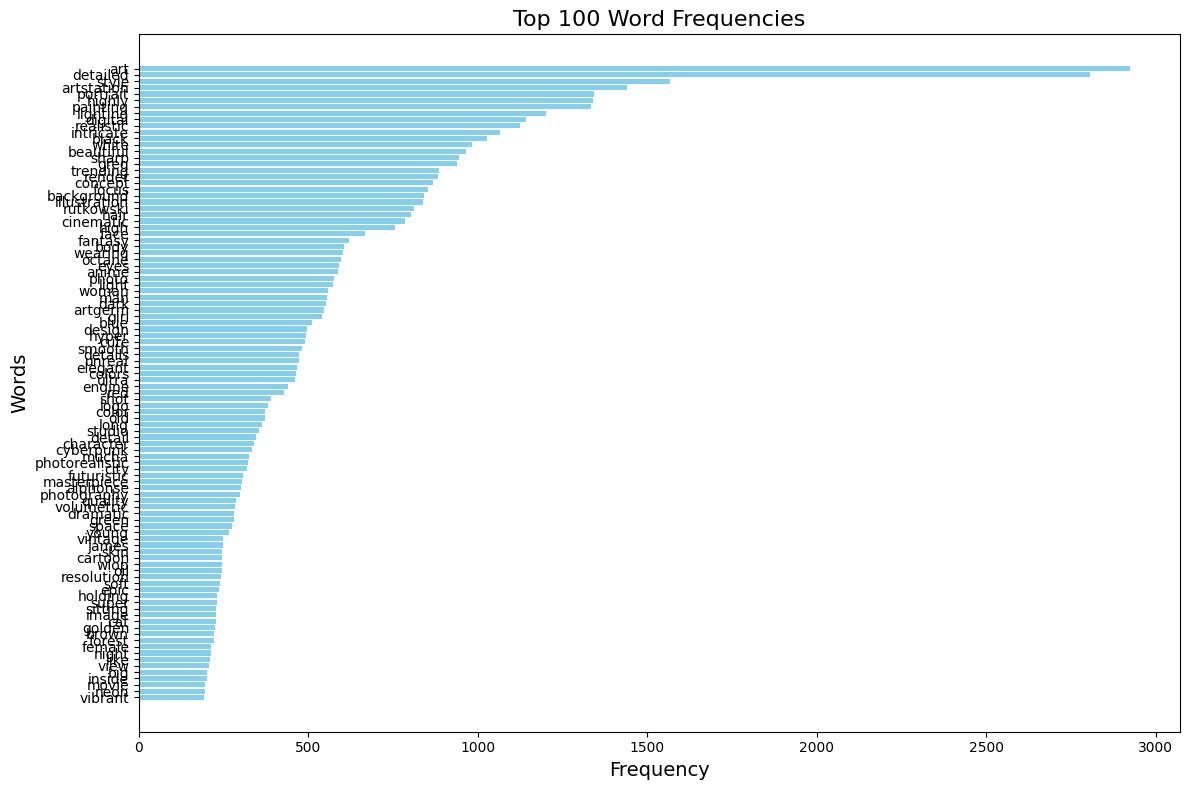

In [ ]:
def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart
    plt.figure(figsize=(12, 8))
    plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top

    # Show the plot
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)

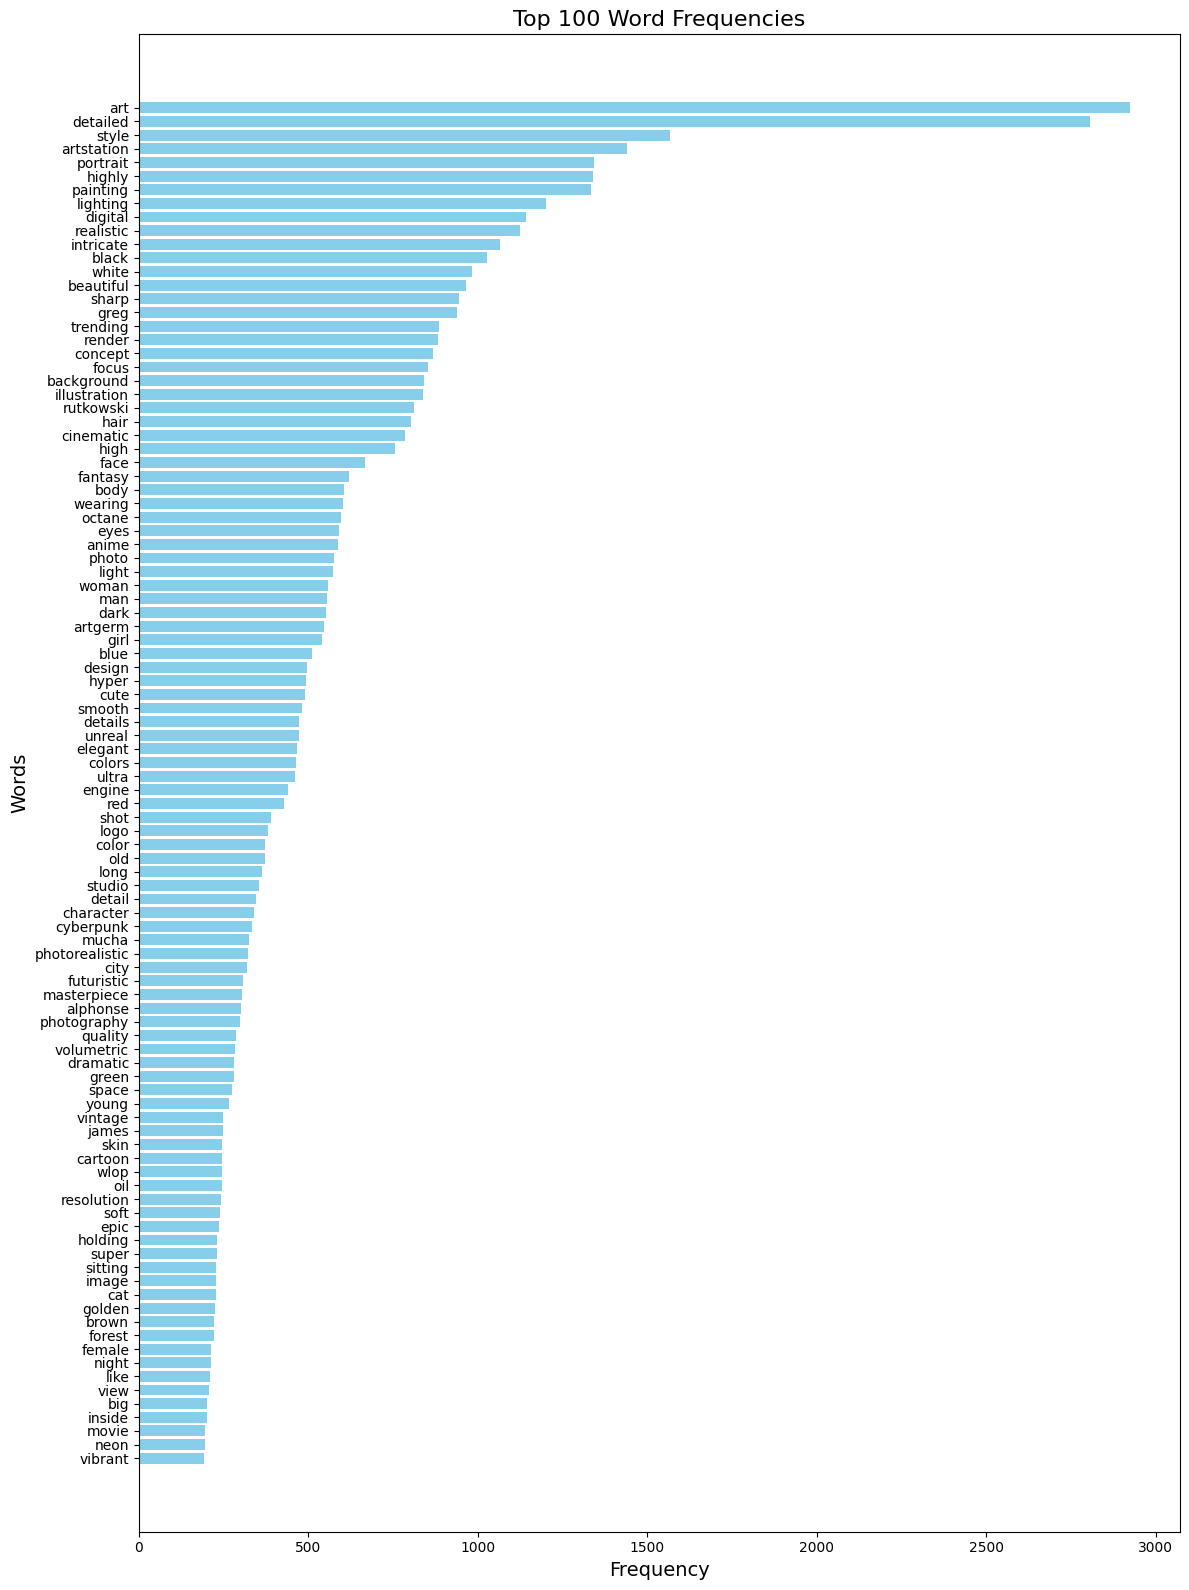

In [ ]:
def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart
    plt.figure(figsize=(12, 16))
    plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top

    # Show the plot
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)

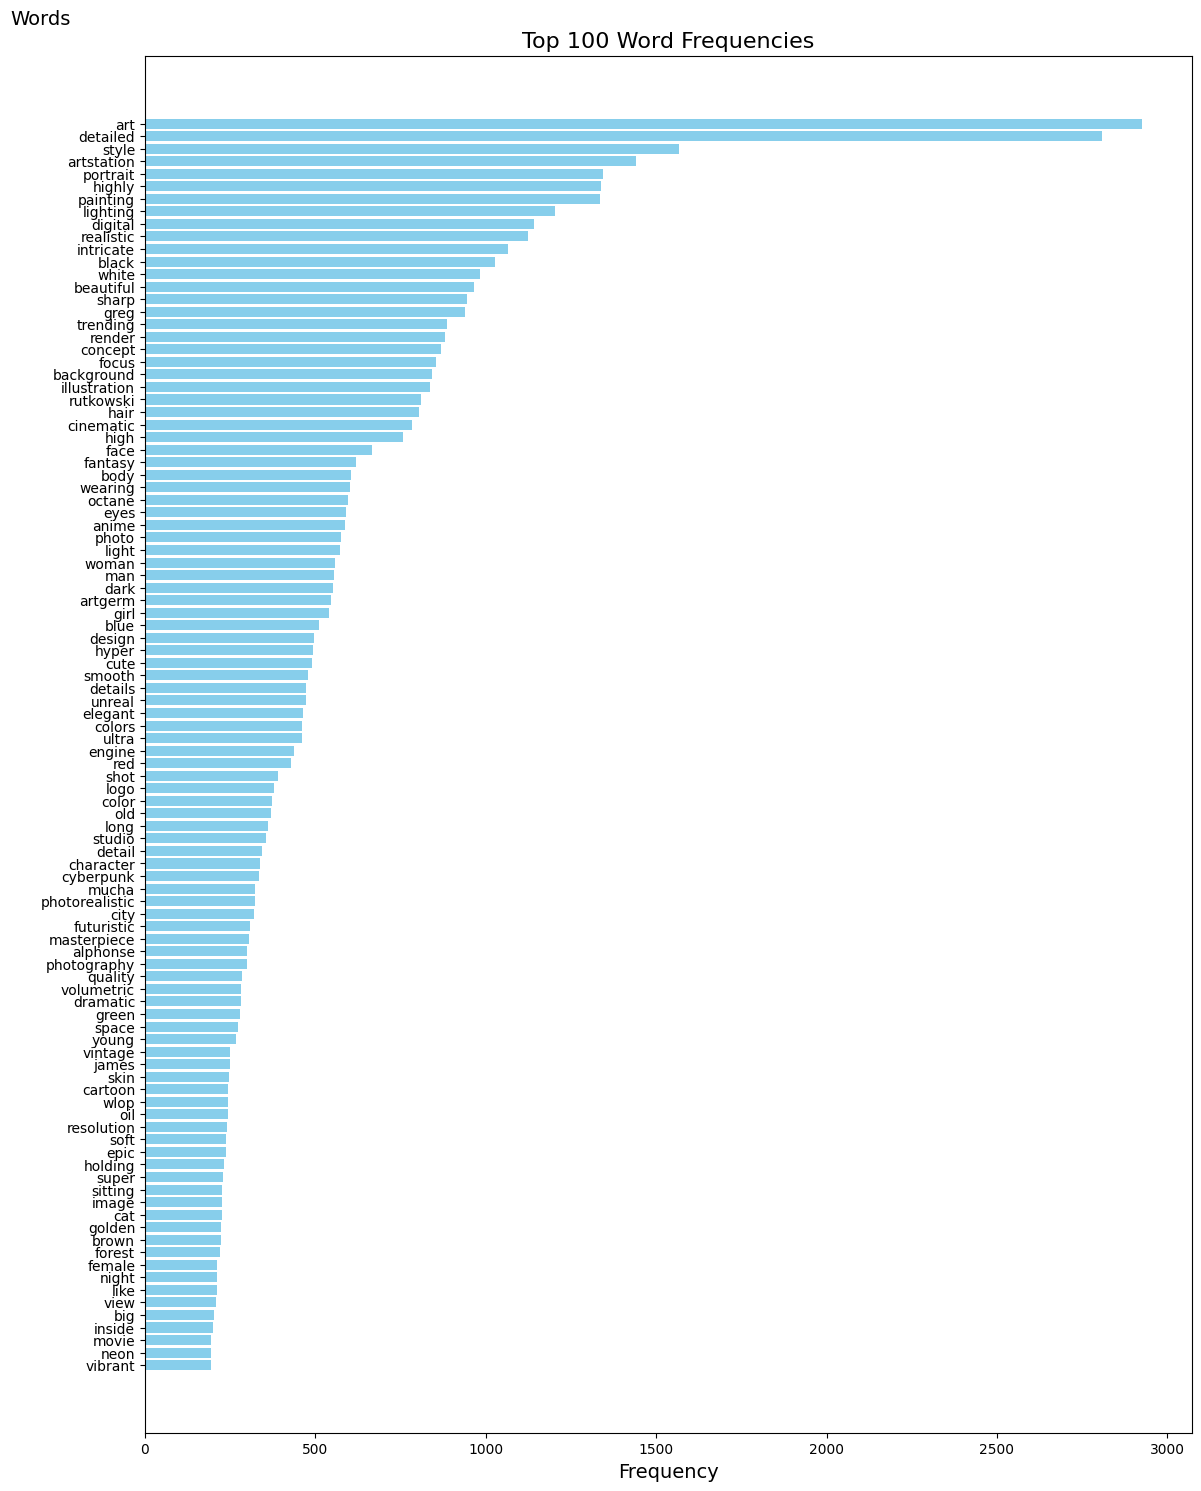

In [ ]:
import matplotlib.pyplot as plt

def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart
    plt.figure(figsize=(12, 16))
    plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)

    # Invert y-axis to show the highest frequency at the top
    plt.gca().invert_yaxis()

    # Add custom text at the top to simulate the y-axis label at the top
    plt.text(-0.1, 1.02, 'Words', ha='center', va='bottom', fontsize=14, transform=plt.gca().transAxes)

    # Adjust layout to ensure labels fit well and are not cut off
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.subplots_adjust(top=0.9)  # Adjust the top margin to ensure the title and label fit

    # Show the plot
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)



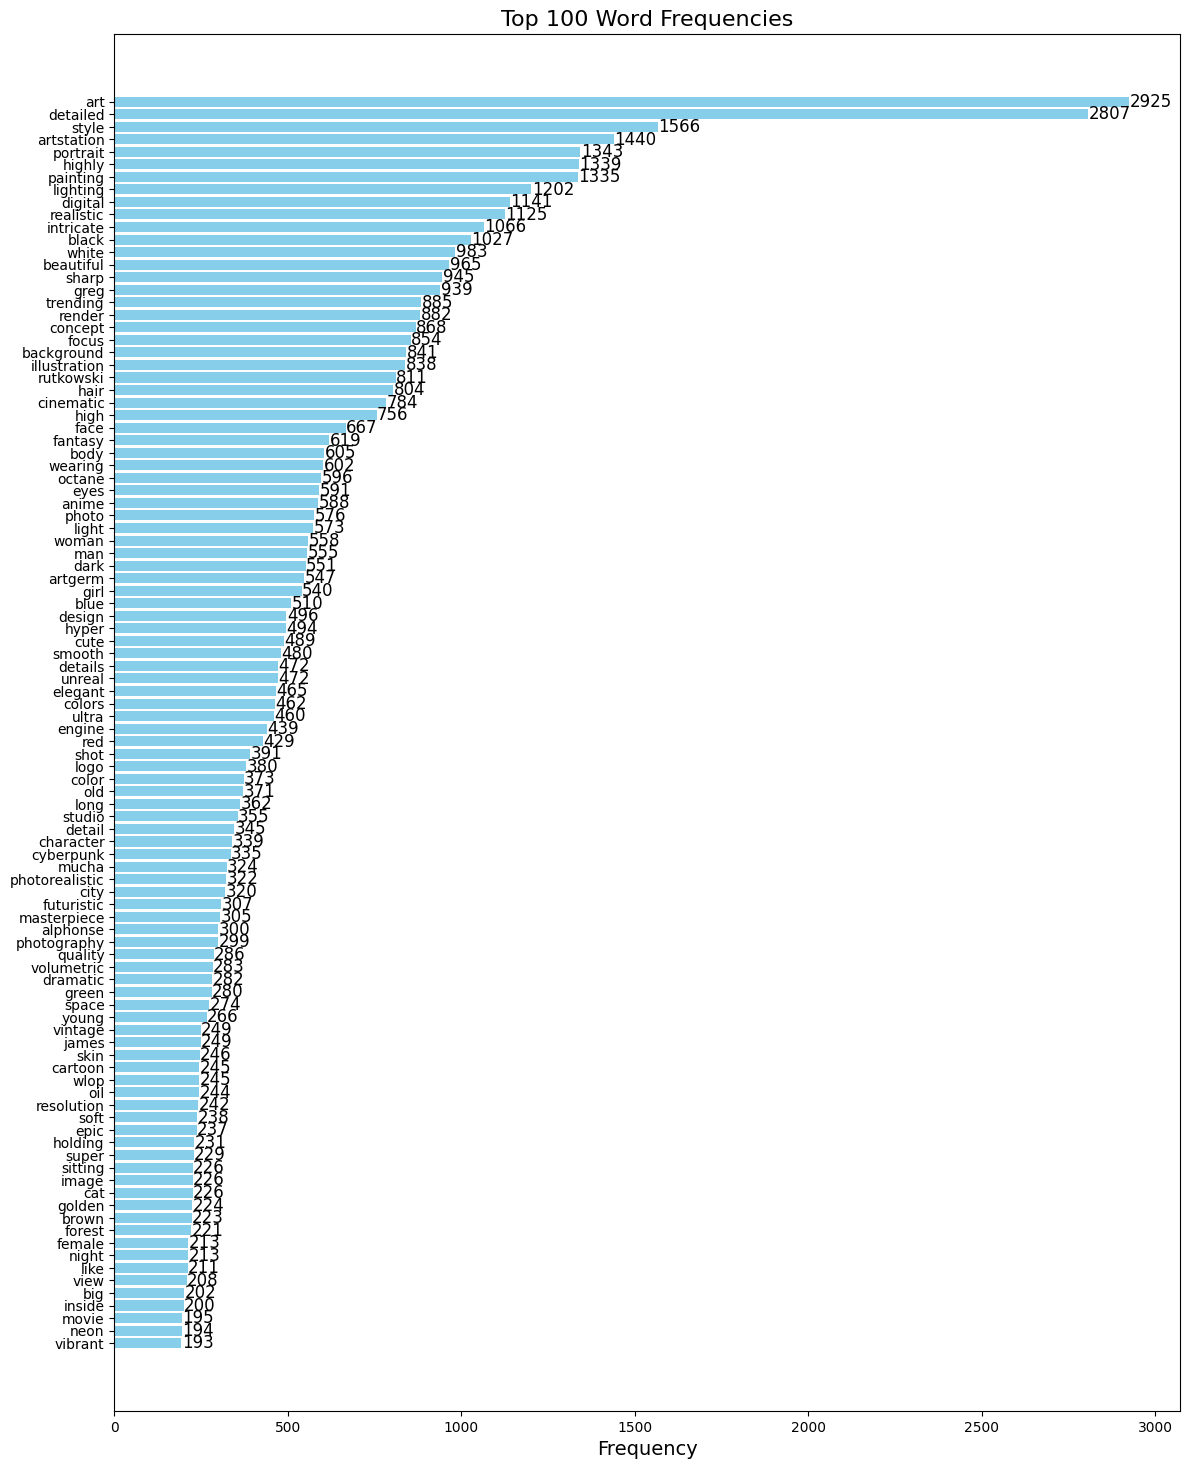

In [ ]:
import matplotlib.pyplot as plt

def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart
    plt.figure(figsize=(12, 16))
    bars = plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)

    # Invert y-axis to show the highest frequency at the top
    plt.gca().invert_yaxis()

    # Display the frequency values above each bar
    for bar in bars:
        width = bar.get_width()  # Get the width (frequency) of each bar
        plt.text(width + 1, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center', fontsize=12)

    # Adjust layout to ensure labels fit well and are not cut off
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.subplots_adjust(top=0.9)  # Adjust the top margin to ensure the title and label fit

    # Show the plot
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)


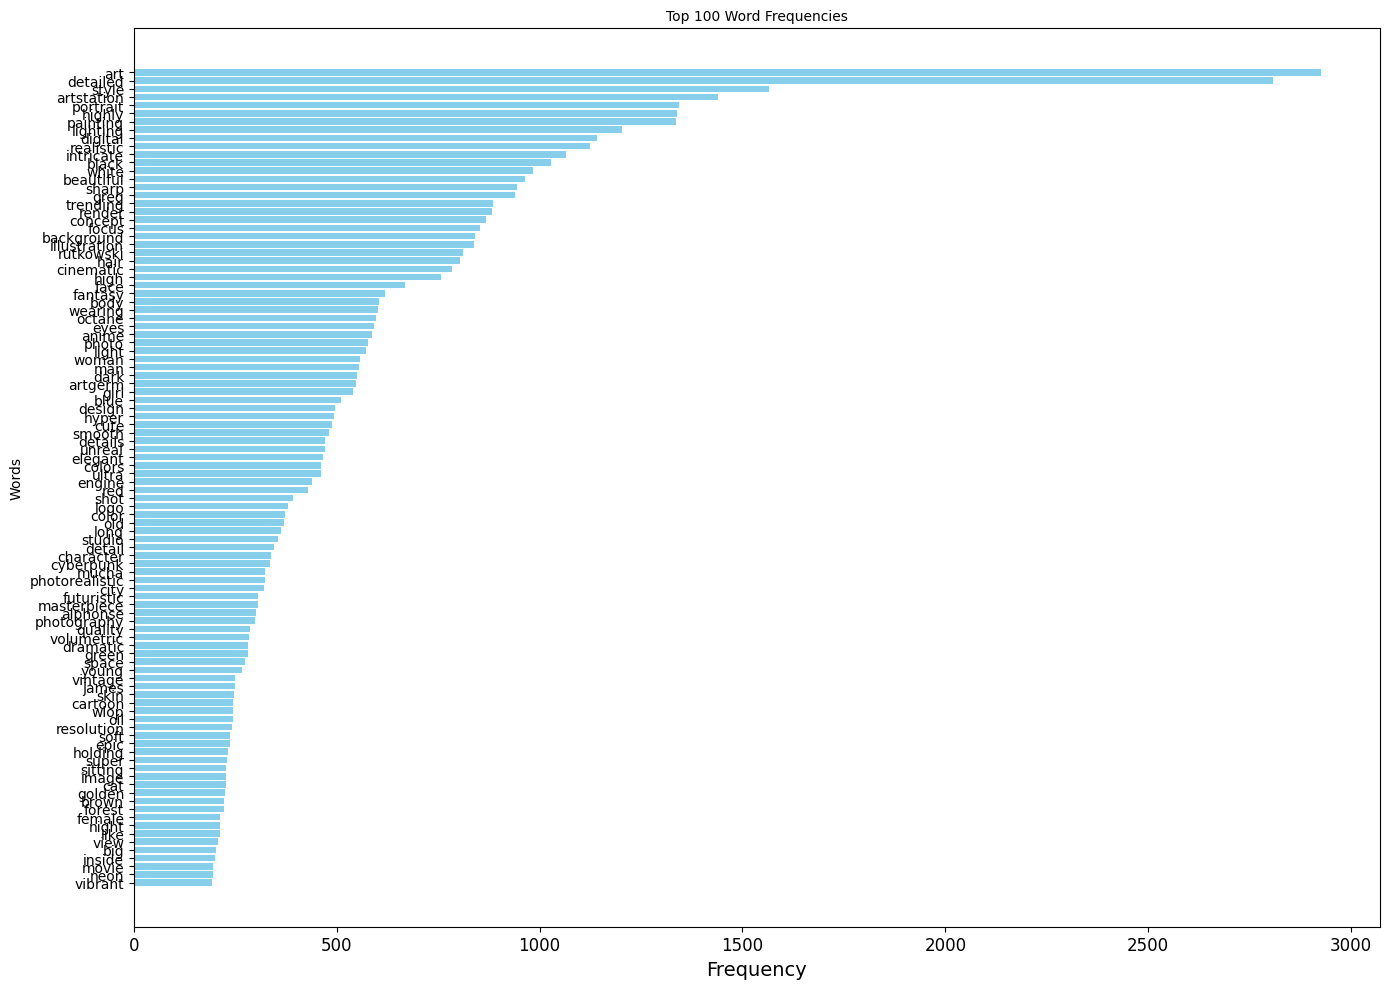

In [ ]:
def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart
    plt.figure(figsize=(14, 10))  # Increased figure size for better readability
    plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=10)
    plt.title(f'Top {top_n} Word Frequencies', fontsize=10)

    # Adjust the y-axis and labels to avoid overlap
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)  # Smaller font size for better fitting
    plt.tight_layout()  # Adjust layout to avoid clipping

    # Show the plot
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)

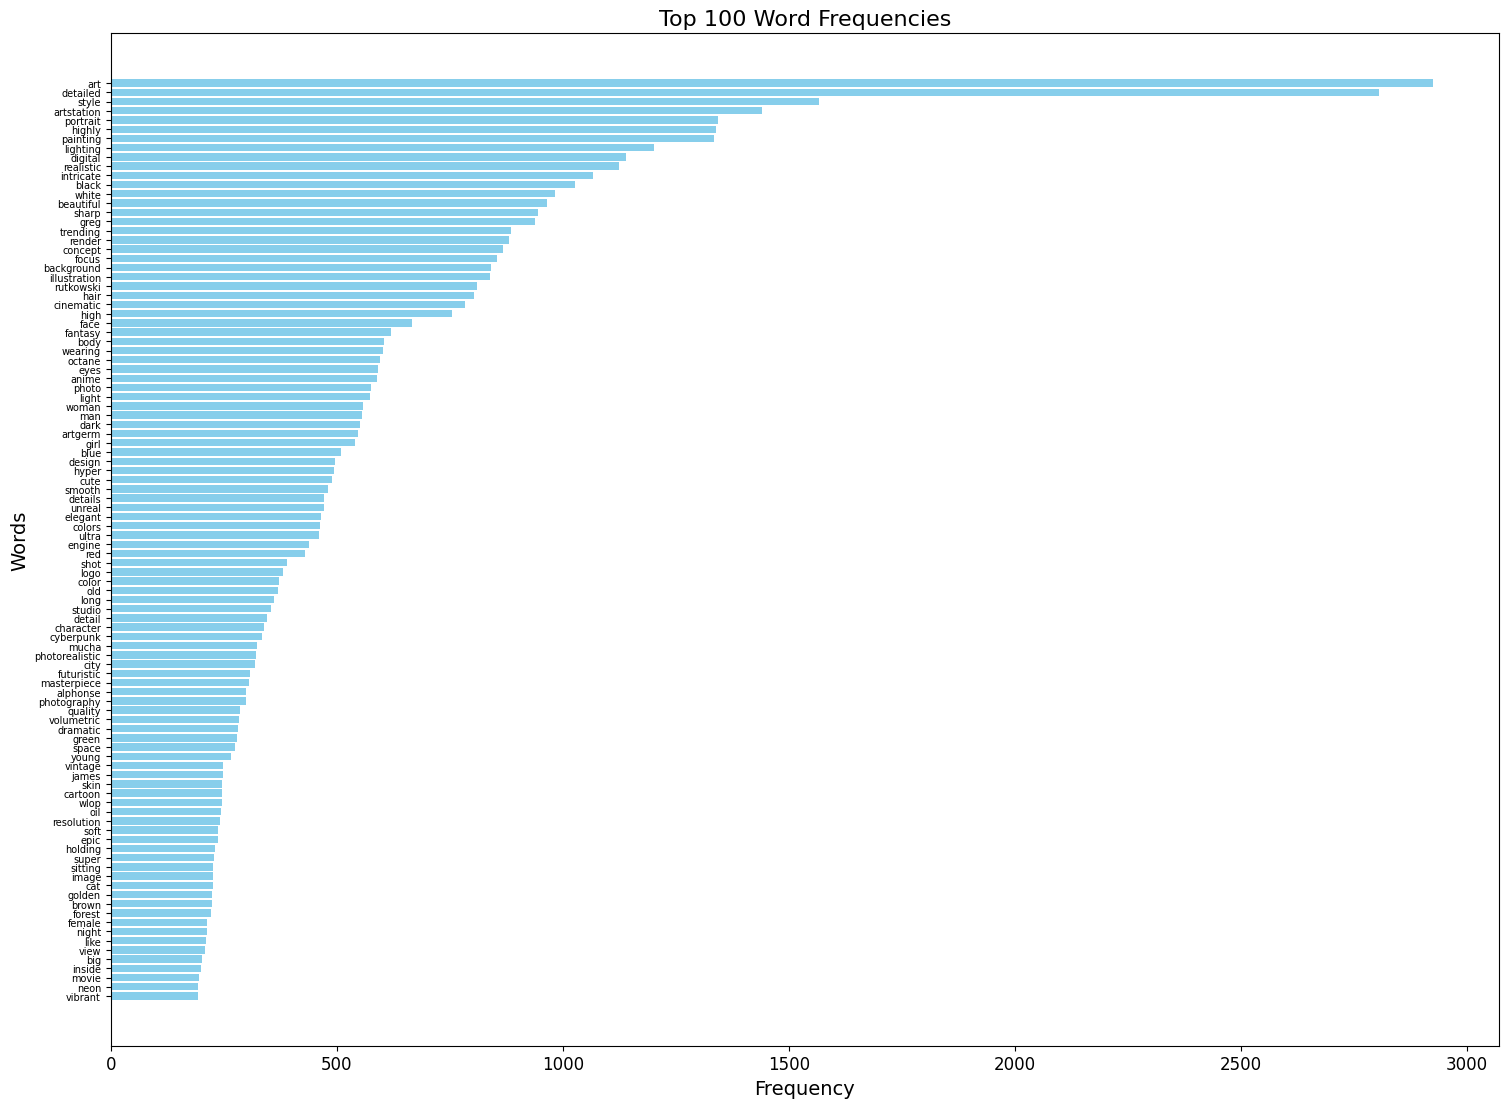

In [ ]:
import matplotlib.pyplot as plt

def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart
    plt.figure(figsize=(16, 12))  # Increase the figure size for better readability

    # Create the bar plot
    plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)

    # Invert y-axis to show the highest frequency at the top
    plt.gca().invert_yaxis()

    # Adjust font sizes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=7)  # Smaller font size for better fitting

    # Increase the spacing between the labels on the y-axis
    plt.tight_layout(pad=4.0)  # Increase padding to avoid clipping and improve readability

    # Show the plot
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)



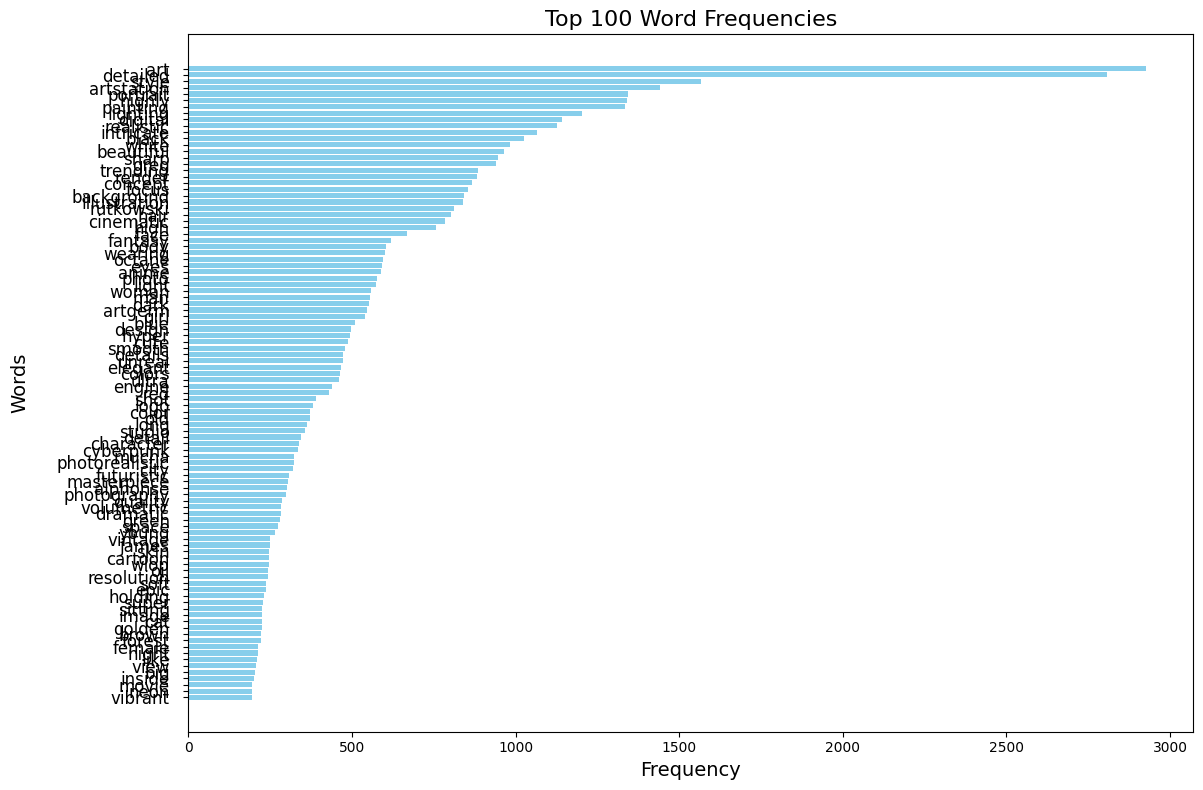

In [ ]:
import matplotlib.pyplot as plt

def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart
    plt.figure(figsize=(12, 8))
    plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14, labelpad=20)  # Increased padding for the y-label
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)

    # Adjust y-tick label padding using tick_params
    plt.tick_params(axis='y', labelsize=12, pad=10)  # Increase padding between ticks and labels

    # Invert y-axis to show the highest frequency at the top
    plt.gca().invert_yaxis()

    # Adjust layout for better spacing
    plt.tight_layout()  # Automatically adjust layout to prevent clipping
    plt.subplots_adjust(left=0.15)  # Adjust left margin for more space

    # Show the plot
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)


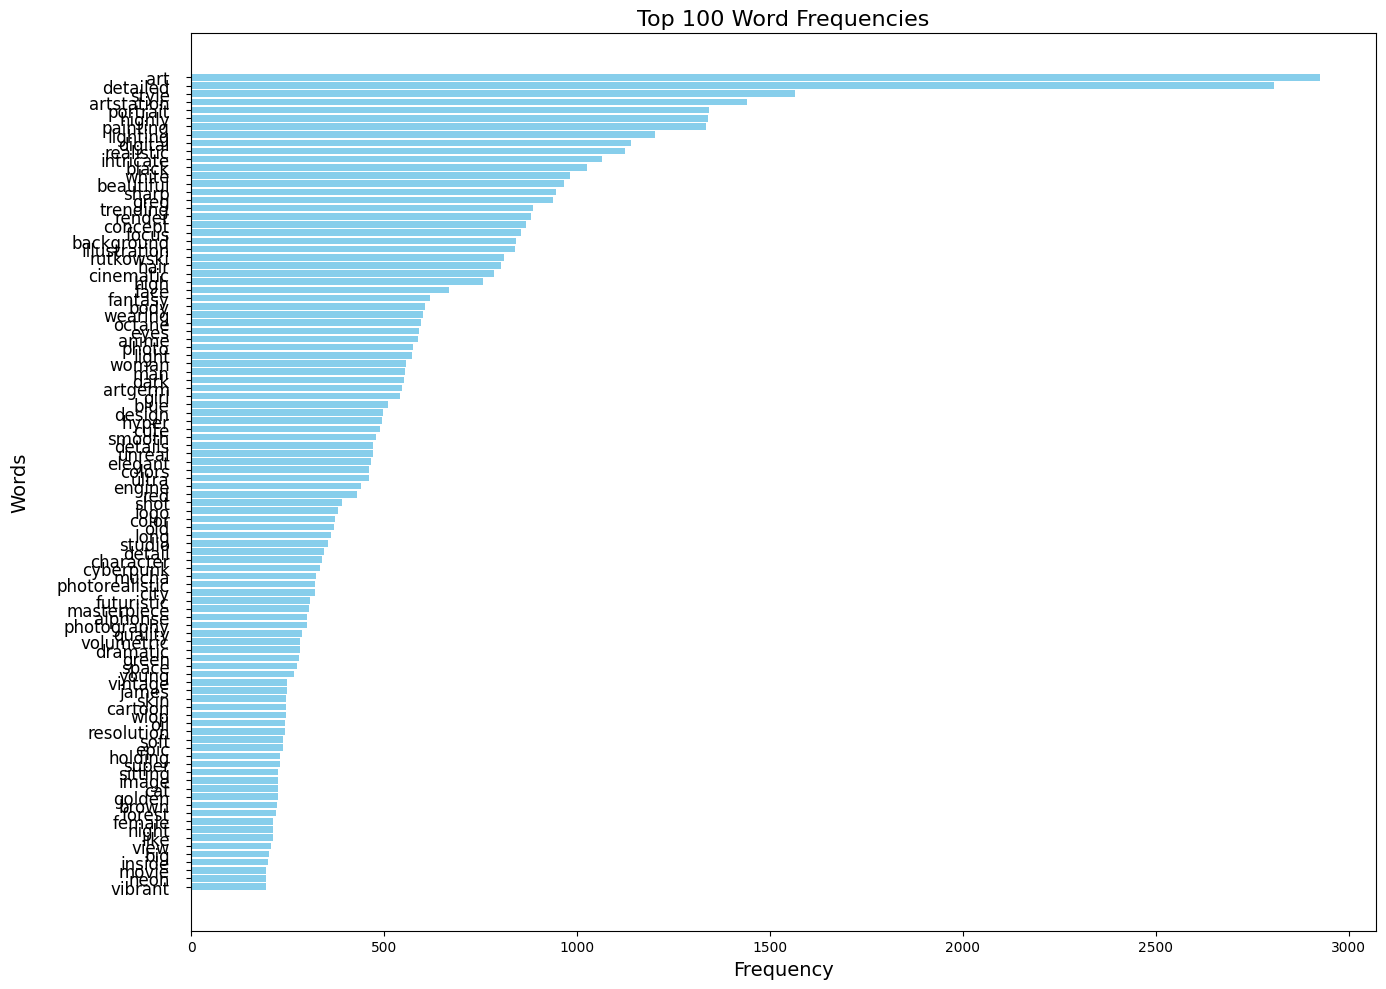

In [ ]:
import matplotlib.pyplot as plt

def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart with a larger figure size
    plt.figure(figsize=(15, 10))  # Increase figure size for better readability
    plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14, labelpad=20)  # Increased padding for the y-label
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)

    # Rotate y-tick labels to avoid overlap if the words are too long
    plt.yticks(rotation=0, fontsize=12)  # Make sure the labels are horizontal

    # Adjust y-tick label padding
    plt.tick_params(axis='y', labelsize=12, pad=12)  # Increase padding between ticks and labels

    # Invert y-axis to show the highest frequency at the top
    plt.gca().invert_yaxis()

    # Adjust layout to prevent clipping of labels and bars
    plt.tight_layout()  # Automatically adjusts layout
    plt.subplots_adjust(left=0.2)  # Increase the left margin

    # Show the plot
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)  # Reduce top_n to 50 for better readability


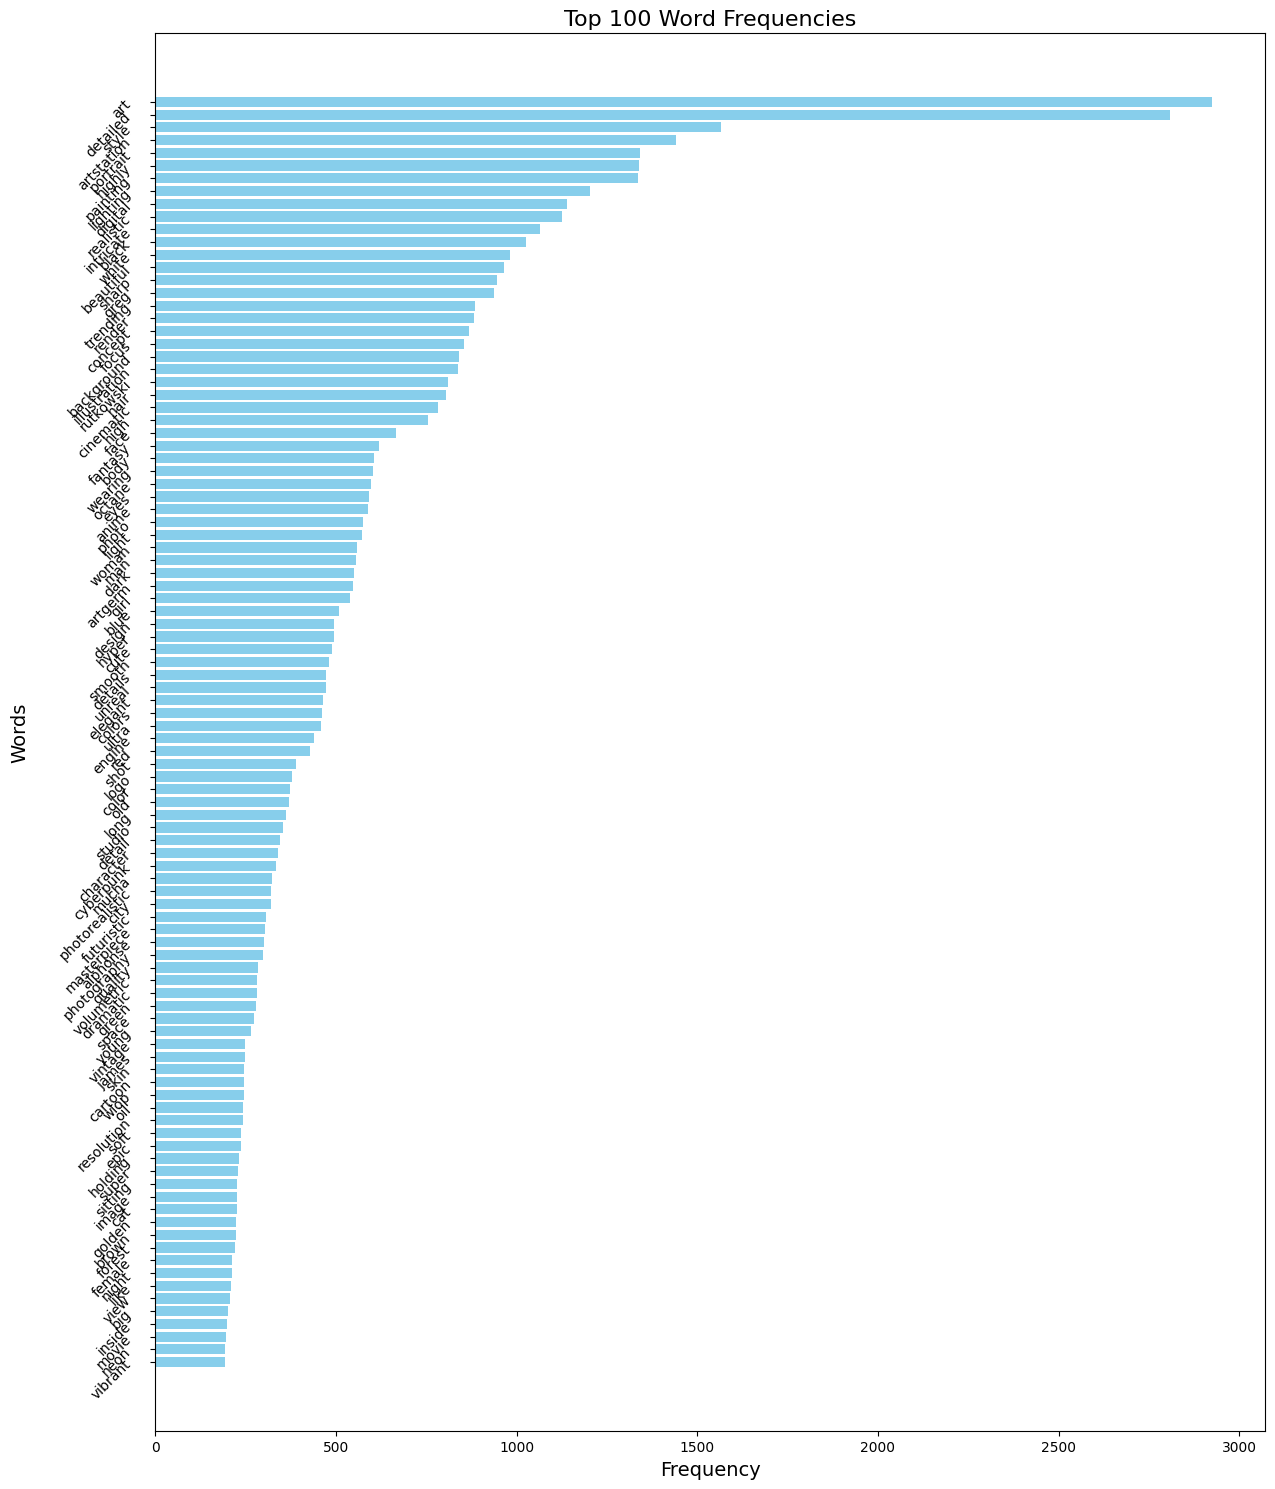

In [ ]:
import matplotlib.pyplot as plt

def plot_horizontal_word_frequencies(sorted_word_freq, top_n=100):
    """
    Plots the top N word frequencies as a horizontal bar chart.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies (e.g., from Counter.most_common()).
    - top_n: Number of top words to plot (default is 100).
    """
    # Extract the top N words and their frequencies
    words, frequencies = zip(*sorted_word_freq[:top_n])

    # Create a horizontal bar chart with a larger figure size
    plt.figure(figsize=(15, 15))  # Increase figure size further to accommodate 100 words
    plt.barh(words, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14, labelpad=20)  # Increased padding for the y-label
    plt.title(f'Top {top_n} Word Frequencies', fontsize=16)

    # Rotate y-tick labels to avoid overlap if the words are too long
    plt.yticks(rotation=45, fontsize=10)  # Rotate the labels by 45 degrees and decrease font size

    # Adjust y-tick label padding
    plt.tick_params(axis='y', labelsize=10, pad=12)  # Decrease font size of tick labels and increase padding

    # Invert y-axis to show the highest frequency at the top
    plt.gca().invert_yaxis()

    # Adjust layout to prevent clipping of labels and bars
    plt.tight_layout()  # Automatically adjusts layout
    plt.subplots_adjust(left=0.25)  # Increase the left margin for more space

    # Show the plot
    plt.show()

# Example usage:
plot_horizontal_word_frequencies(sorted_word_freq, top_n=100)


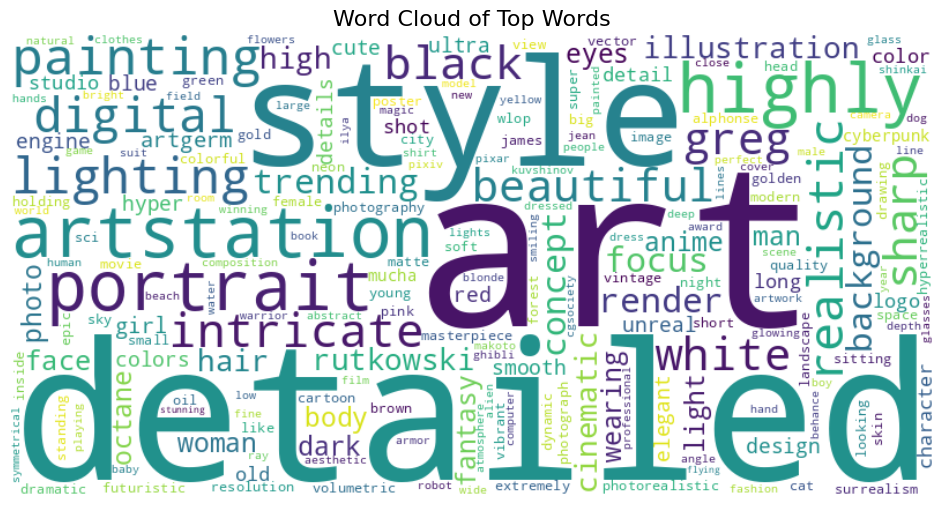

In [ ]:
from wordcloud import WordCloud

def generate_word_cloud(sorted_word_freq):
    """
    Generates a word cloud from sorted word frequencies.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies.
    """
    # Convert sorted_word_freq into a dictionary
    word_freq_dict = dict(sorted_word_freq)

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate_from_frequencies(word_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title('Word Cloud of Top Words', fontsize=16)
    plt.show()

# Example usage:
generate_word_cloud(sorted_word_freq[:500])  # Pass the top 100 words

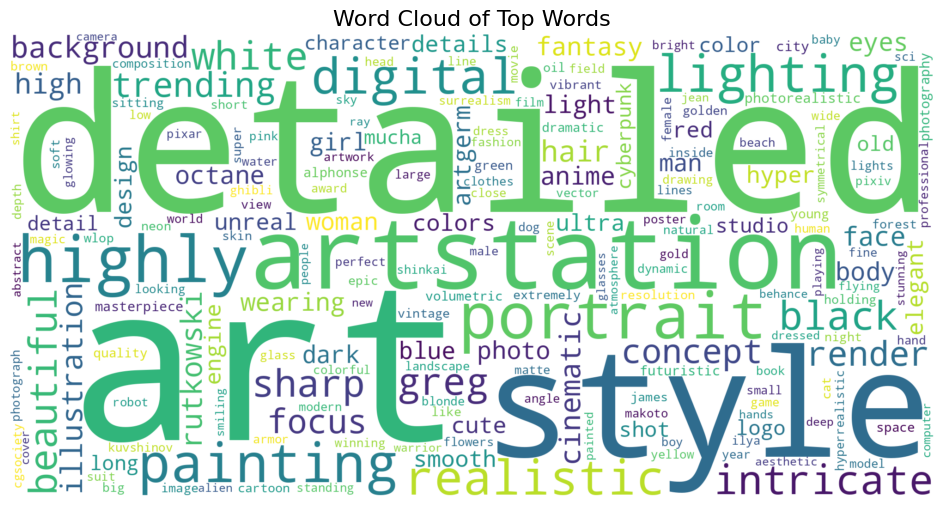

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(sorted_word_freq, custom_colors=None):
    """
    Generates a word cloud from sorted word frequencies.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies.
    - custom_colors: A list of colors to use in the word cloud (optional).
    """
    # Convert sorted_word_freq into a dictionary
    word_freq_dict = dict(sorted_word_freq)

    # Define a color map if custom colors are provided
    if custom_colors:
        wordcloud = WordCloud(
            width=2000,
            height=1000,
            background_color='white',
            colormap=custom_colors  # Set custom color map
        ).generate_from_frequencies(word_freq_dict)
    else:
        wordcloud = WordCloud(
            width=1800,
            height=1400,
            background_color='white',
            colormap='viridis'  # Default color map
        ).generate_from_frequencies(word_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title('Word Cloud of Top Words', fontsize=16)
    plt.show()

# Example usage:
custom_colors =  'viridis'  # You can change to 'Reds', 'Purples', or a list of colors
generate_word_cloud(sorted_word_freq[:1000], custom_colors)

color options are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r...

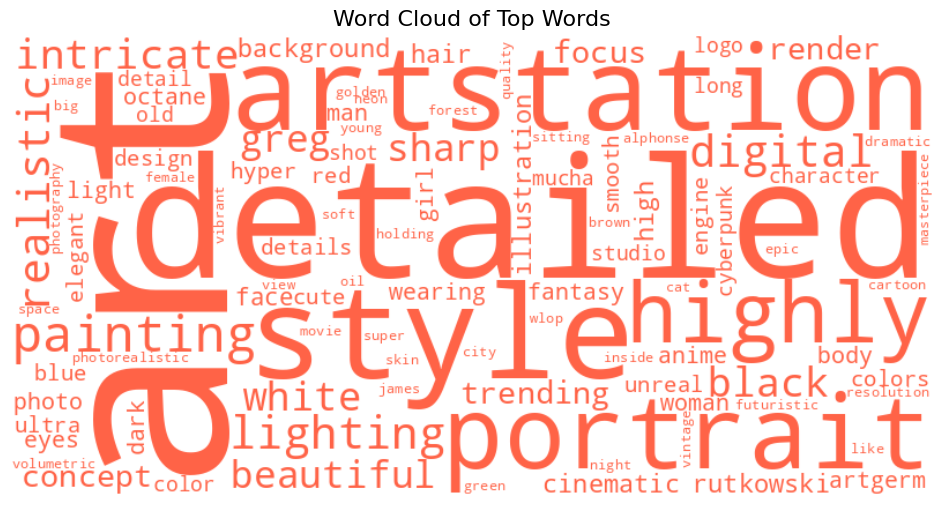

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def frequency_to_color(frequency):
    """
    A simple function to map frequency to color.
    Higher frequency words will be lighter.
    """
    if frequency > 50:
        return '#ff6347'  # Red
    elif frequency > 20:
        return '#4682b4'  # Blue
    else:
        return '#32cd32'  # Green

def generate_colored_word_cloud(sorted_word_freq):
    """
    Generates a word cloud with custom color based on frequency.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies.
    """
    # Convert sorted_word_freq into a dictionary
    word_freq_dict = dict(sorted_word_freq)

    # Define a color function for each word based on frequency
    def color_func(word, **kwargs):
        freq = word_freq_dict.get(word, 0)
        return frequency_to_color(freq)

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        color_func=color_func  # Use custom color function
    ).generate_from_frequencies(word_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title('Word Cloud of Top Words', fontsize=16)
    plt.show()

# Example usage:
generate_colored_word_cloud(sorted_word_freq[:100])  # Use top 100 words

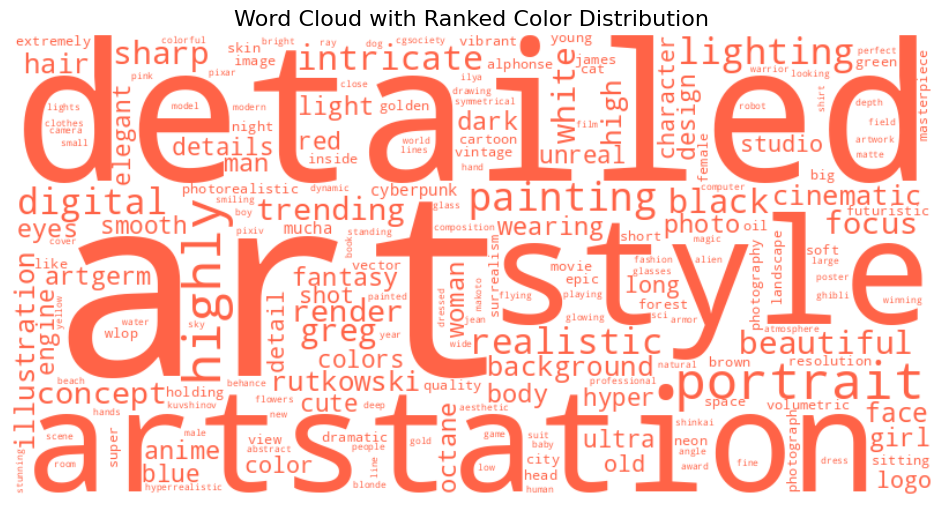

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def rank_to_color(rank, total_words):
    """
    A function to map rank to a color. Divides the words into groups
    based on rank and assigns a color to each group.
    """
    # Define color groups based on rank
    group_size = total_words // 4  # Dividing into 4 groups (adjust as needed)

    if rank <= group_size:
        return '#ff6347'  # Color for top 25% words (red)
    elif rank <= 2 * group_size:
        return '#4682b4'  # Color for next 25% (blue)
    elif rank <= 3 * group_size:
        return '#32cd32'  # Color for next 25% (green)
    else:
        return '#ff4500'  # Color for last 25% (orange)

def generate_ranked_colored_word_cloud(sorted_word_freq):
    """
    Generates a word cloud where words are colored based on their rank in frequency.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies.
    """
    total_words = len(sorted_word_freq)

    # Convert sorted_word_freq into a dictionary
    word_freq_dict = dict(sorted_word_freq)

    # Define a color function based on the rank of each word
    def color_func(word, **kwargs):
        rank = list(word_freq_dict.keys()).index(word) + 1  # Get the rank of the word
        return rank_to_color(rank, total_words)

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        color_func=color_func  # Use the custom color function based on rank
    ).generate_from_frequencies(word_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title('Word Cloud with Ranked Color Distribution', fontsize=16)
    plt.show()

# Example usage:
generate_ranked_colored_word_cloud(sorted_word_freq[:1000])  # Use top 100 words


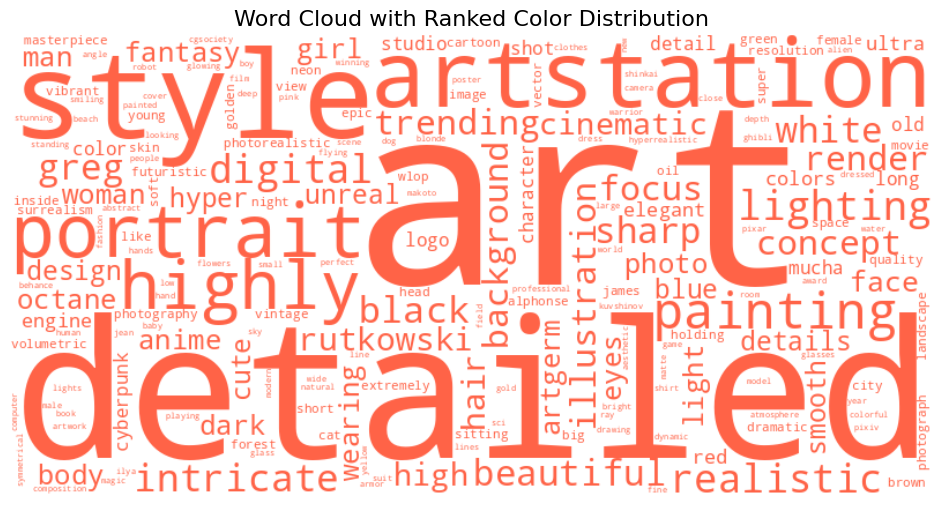

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def assign_color_by_rank(sorted_word_freq, total_words):
    """
    Assigns colors to words based on their frequency rank.
    Divides words into 4 equal-sized groups, and assigns a color to each group.
    """
    group_size = total_words // 4  # Dividing into 4 groups

    # Create a color dictionary to store each word's color
    word_colors = {}

    for i, (word, freq) in enumerate(sorted_word_freq):
        if i < group_size:
            word_colors[word] = '#ff6347'  # Red for top 25%
        elif i < 2 * group_size:
            word_colors[word] = '#4682b4'  # Blue for next 25%
        elif i < 3 * group_size:
            word_colors[word] = '#32cd32'  # Green for next 25%
        else:
            word_colors[word] = '#ff4500'  # Orange for last 25%

    return word_colors

def generate_ranked_colored_word_cloud(sorted_word_freq):
    """
    Generates a word cloud where words are colored based on their rank in frequency.

    Parameters:
    - sorted_word_freq: List of tuples containing words and their frequencies.
    """
    total_words = len(sorted_word_freq)

    # Create a color mapping based on rank
    word_colors = assign_color_by_rank(sorted_word_freq, total_words)

    # Convert sorted_word_freq into a dictionary
    word_freq_dict = dict(sorted_word_freq)

    # Define a color function that uses the precomputed word_colors
    def color_func(word, **kwargs):
        return word_colors.get(word, '#000000')  # Default to black if no color is assigned

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        color_func=color_func  # Use the precomputed color function
    ).generate_from_frequencies(word_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title('Word Cloud with Ranked Color Distribution', fontsize=16)
    plt.show()

# Example usage:
generate_ranked_colored_word_cloud(sorted_word_freq[:1000])  # Use top 1000 words or as desired

In [ ]:
#entity extration tests

In [4]:
import pandas as pd

# Replace 'prompts.csv' with csv needed
df = pd.read_csv("/content/extracted_data/RandomUsers_prompts.csv")

# Display the first few rows of the DataFrame
df.head()

Unnamed: 0                                    id  \
0      829140  e99f104e-7e5f-4b0a-99b4-9ae269ff065b   
1      705164  c6908fc0-2ba4-4769-b7de-fdf1559628d4   
2      769475  d8c30204-8370-4361-9003-2cb3d0143975   
3      442785  7c8df9ee-780e-4f52-8c80-af94a7daea06   
4      332497  5d622845-a3ab-4d93-bc17-41493d667af7   

                                              prompt  \
0  robot revolutionary speaking to a crowd of rob...   
1                       smiling cute sexy anime girl   
2  CUTE AND ADORABLE CARTOON FLUFFY PUPPY, SPACE,...   
3  Beautiful black man with white beard wearing w...   
4  3d portrait of  profesional photographer in 20...   

                                                 url  width  height  \
0  https://krea-prod-v1-generations.s3.us-east-1....    512     512   
1  https://image.lexica.art/full_jpg/c6908fc0-2ba...    512     768   
2  https://image.lexica.art/full_jpg/d8c30204-837...    512     768   
3  https://image.lexica.art/full_jpg/7c8df9ee-780...    512     768   
4  https://image.lexica.art/full_jpg/04a758a9-746...    512     768   

              source_site  userId  
0  stablediffusionweb.com       1  
1              lexica.art       1  
2              lexica.art       1  
3              lexica.art       1  
4              lexica.art       1

In [ ]:
from collections import Counter

def extract_entities(df, userId, num_entities, nlp):
    """
    Extract entities from the prompts of a specific user and return the most common entities.

    Parameters:
    - df: DataFrame containing 'user_id' and 'prompt' columns.
    - user_id: The ID of the user to filter prompts for.
    - num_entities: Number of top entities to return.
    - nlp: The NLP pipeline (e.g., SpaCy model) for entity extraction.

    Returns:
    - List of tuples with the most common entities and their counts.
    """
    # Filter the DataFrame for the specified user ID
    user_prompts = df[df['userId'] == userId]['prompt'].dropna()

    # Extract entities
    entities = []
    for prompt in user_prompts:
        doc = nlp(prompt)
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])

    # Count the most common entities
    entity_counter = Counter(entities)
    most_common_entities = entity_counter.most_common(num_entities)

    # Print the results
    print("Most Common Entities:")
    for entity, count in most_common_entities:
        print(f"{entity[0]} ({entity[1]}): {count}")

    return most_common_entities


In [ ]:
# Load SpaCy model
import spacy
nlp = spacy.load("en_core_web_sm")

# Set the maximum length for spaCy
nlp.max_length = 150_000_000  # Increase as needed

# Extract entities for user 1, returning the top 3 most common
extract_entities(df, userId=1, num_entities=50, nlp=nlp)

Most Common Entities:
greg rutkowski (PERSON): 458
8k (CARDINAL): 442
8 (CARDINAL): 327
4k (CARDINAL): 221
3d (CARDINAL): 175
4 (CARDINAL): 165
5 (CARDINAL): 145
3 (CARDINAL): 86
Greg Rutkowski (PERSON): 80
wlop (ORG): 78
night (TIME): 77
two (CARDINAL): 72
2 (CARDINAL): 63
one (CARDINAL): 61
kuvshinov (GPE): 59
2d (CARDINAL): 57
un (ORG): 56
sci-fi (ORG): 54
WLOP (ORG): 48
8k (DATE): 47
japanese (NORP): 38
Artgerm (GPE): 37
half (CARDINAL): 37
james gilleard (PERSON): 36
james jean (PERSON): 35
three (CARDINAL): 34
1 (CARDINAL): 29
Depth (PERSON): 27
charlie bowater (PERSON): 27
90 (DATE): 27
justin (ORG): 27
Alphonse Mucha (PERSON): 26
Unreal Engine (ORG): 26
Greg Tocchini (PERSON): 25
35mm (QUANTITY): 25
jordan grimmer (PERSON): 25
winter (DATE): 24
400 (CARDINAL): 24
dan mumford (PERSON): 23
graffiti (PERSON): 23
creepy (NORP): 23
thirds (CARDINAL): 23
summer (DATE): 23
Russian (NORP): 22
lois van baarle (PERSON): 22
akira toriyama (PERSON): 22
Virgil Finlay (PERSON): 21
stanley ar

[(('greg rutkowski', 'PERSON'), 458),
 (('8k', 'CARDINAL'), 442),
 (('8', 'CARDINAL'), 327),
 (('4k', 'CARDINAL'), 221),
 (('3d', 'CARDINAL'), 175),
 (('4', 'CARDINAL'), 165),
 (('5', 'CARDINAL'), 145),
 (('3', 'CARDINAL'), 86),
 (('Greg Rutkowski', 'PERSON'), 80),
 (('wlop', 'ORG'), 78),
 (('night', 'TIME'), 77),
 (('two', 'CARDINAL'), 72),
 (('2', 'CARDINAL'), 63),
 (('one', 'CARDINAL'), 61),
 (('kuvshinov', 'GPE'), 59),
 (('2d', 'CARDINAL'), 57),
 (('un', 'ORG'), 56),
 (('sci-fi', 'ORG'), 54),
 (('WLOP', 'ORG'), 48),
 (('8k', 'DATE'), 47),
 (('japanese', 'NORP'), 38),
 (('Artgerm', 'GPE'), 37),
 (('half', 'CARDINAL'), 37),
 (('james gilleard', 'PERSON'), 36),
 (('james jean', 'PERSON'), 35),
 (('three', 'CARDINAL'), 34),
 (('1', 'CARDINAL'), 29),
 (('Depth', 'PERSON'), 27),
 (('charlie bowater', 'PERSON'), 27),
 (('90', 'DATE'), 27),
 (('justin', 'ORG'), 27),
 (('Alphonse Mucha', 'PERSON'), 26),
 (('Unreal Engine', 'ORG'), 26),
 (('Greg Tocchini', 'PERSON'), 25),
 (('35mm', 'QUANTIT

In [ ]:
from collections import Counter

def extract_filtered_entities(df, userId, num_entities, nlp):
    """
    Extract and count specific types of entities from a user's prompts.

    Parameters:
    - df: DataFrame containing 'user_id' and 'prompt' columns.
    - user_id: The ID of the user to filter prompts for.
    - num_entities: Number of top entities to return.
    - nlp: The NLP pipeline (e.g., SpaCy model) for entity extraction.

    Returns:
    - List of tuples with the most common entities and their counts.
    """
    # Entity types to include
    target_entity_types = {"PERSON", "NORP", "FAC", "ORG", "GPE",
                           "LOC", "PRODUCT", "EVENT", "WORK_OF_ART"}

    # Filter the DataFrame for the specified user ID
    user_prompts = df[df['userId'] == userId]['prompt'].dropna()

    # Extract entities
    entities = []
    for prompt in user_prompts:
        doc = nlp(prompt)
        entities.extend([(ent.text, ent.label_) for ent in doc.ents if ent.label_ in target_entity_types])

    # Count the most common entities
    entity_counter = Counter(entities)
    most_common_entities = entity_counter.most_common(num_entities)

    # Print the results
    print("Most Common Entities:")
    for entity, count in most_common_entities:
        print(f"{entity[0]} ({entity[1]}): {count}")

    return most_common_entities


In [ ]:
# Load SpaCy model
import spacy
nlp = spacy.load("en_core_web_sm")

nlp.max_length = 150_000_000  # Increase as needed

# Extract specific entity types for user 1, returning the top 5 most common
extract_filtered_entities(df, userId=1, num_entities=50, nlp=nlp)

Most Common Entities:
greg rutkowski (PERSON): 458
Greg Rutkowski (PERSON): 80
wlop (ORG): 78
kuvshinov (GPE): 59
un (ORG): 56
sci-fi (ORG): 54
WLOP (ORG): 48
japanese (NORP): 38
Artgerm (GPE): 37
james gilleard (PERSON): 36
james jean (PERSON): 35
Depth (PERSON): 27
charlie bowater (PERSON): 27
justin (ORG): 27
Alphonse Mucha (PERSON): 26
Unreal Engine (ORG): 26
Greg Tocchini (PERSON): 25
jordan grimmer (PERSON): 25
dan mumford (PERSON): 23
graffiti (PERSON): 23
creepy (NORP): 23
Russian (NORP): 22
lois van baarle (PERSON): 22
akira toriyama (PERSON): 22
Virgil Finlay (PERSON): 21
stanley artgerm lau (ORG): 21
Japanese (NORP): 21
ArtStation (ORG): 21
french (NORP): 21
Deconstruction, Highly (ORG): 20
Chinese (NORP): 20
greg tocchini (PERSON): 20
american (NORP): 20
James Jean (PERSON): 19
Hajime Sorayama (PERSON): 19
krenz cushart (PERSON): 19
indian (NORP): 18
norman rockwell (PERSON): 17
james gurney (PERSON): 16
asian (NORP): 16
sci - fi (ORG): 16
Pixar (PERSON): 16
tom bagshaw (PE

[(('greg rutkowski', 'PERSON'), 458),
 (('Greg Rutkowski', 'PERSON'), 80),
 (('wlop', 'ORG'), 78),
 (('kuvshinov', 'GPE'), 59),
 (('un', 'ORG'), 56),
 (('sci-fi', 'ORG'), 54),
 (('WLOP', 'ORG'), 48),
 (('japanese', 'NORP'), 38),
 (('Artgerm', 'GPE'), 37),
 (('james gilleard', 'PERSON'), 36),
 (('james jean', 'PERSON'), 35),
 (('Depth', 'PERSON'), 27),
 (('charlie bowater', 'PERSON'), 27),
 (('justin', 'ORG'), 27),
 (('Alphonse Mucha', 'PERSON'), 26),
 (('Unreal Engine', 'ORG'), 26),
 (('Greg Tocchini', 'PERSON'), 25),
 (('jordan grimmer', 'PERSON'), 25),
 (('dan mumford', 'PERSON'), 23),
 (('graffiti', 'PERSON'), 23),
 (('creepy', 'NORP'), 23),
 (('Russian', 'NORP'), 22),
 (('lois van baarle', 'PERSON'), 22),
 (('akira toriyama', 'PERSON'), 22),
 (('Virgil Finlay', 'PERSON'), 21),
 (('stanley artgerm lau', 'ORG'), 21),
 (('Japanese', 'NORP'), 21),
 (('ArtStation', 'ORG'), 21),
 (('french', 'NORP'), 21),
 (('Deconstruction, Highly', 'ORG'), 20),
 (('Chinese', 'NORP'), 20),
 (('greg tocc

In [ ]:
from collections import Counter
from transformers import pipeline

def analyze_image_ai_prompts(
    df, userId, num_entities=100, model_name="bert-base-uncased"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - user_id: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - model_name: NLP model to use for semantic analysis (default: BERT).

    Returns:
    - Dictionary with categorized entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Initialize a Transformer-based NLP pipeline
    nlp = pipeline("ner", model=model_name, grouped_entities=True)

    # Categories to analyze
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Extract entities and categorize them
    categorized_entities = {key: [] for key in categories}
    all_entities = []

    for prompt in user_prompts:
        entities = nlp(prompt)
        for entity in entities:
            text = entity["word"]
            label = entity["entity_group"]
            all_entities.append((text, label))

            # Categorize entities based on keywords
            for category, keywords in categories.items():
                if any(keyword in text.lower() for keyword in keywords):
                    categorized_entities[category].append(text)

    # Count occurrences in each category
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}


In [ ]:
# Example DataFrame


# Analyze user prompts for user ID 1
results = analyze_image_ai_prompts(df, userId=1, num_entities=50)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


Summary of AI Image Prompt Analysis:

Styles (Top 50):
  painting: 40
  , highly detailed, digital painting, arts: 22
  , intricate, elegant, highly detailed, digital painting, arts: 19
  painting of: 15
  painting,: 13
  rendered, art style by: 12
  , digital painting, arts: 10
  a painting: 10
  , digital art, realistic painting, d: 10
  ##real engine, cozy indoor lighting, artstation, detailed, digital painting, cinematic,: 9
  ##tti elegant highly detailed digital painting arts: 8
  , digital painting,: 8
  cyberpunk: 8
  mucha, spike painting: 7
  painting by: 7
  , hyper realistic style, oil painting, fantasy by: 6
  art, realistic painting, d: 6
  , oil painting,: 6
  , digital painting, fan art,: 5
  , painting: 5
  concept design, painting, detailed, vivid, trending on artstation,: 4
  digital painting,: 4
  portrait painting: 4
  . a painting by lucifer of the hellish damnation: 4
  oil painting: 4
  cyberpunk city: 4
  , digital art, realistic painting,: 4
  , fantasy, intri

In [ ]:
from collections import Counter
from transformers import pipeline

def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=10, model_name="bert-base-uncased"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - userId: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - num_prompts: Number of user prompts to analyze.
    - model_name: NLP model to use for semantic analysis (default: BERT).

    Returns:
    - Dictionary with categorized entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Initialize a Transformer-based NLP pipeline
    nlp = pipeline("ner", model=model_name, grouped_entities=True)

    # Categories to analyze
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Extract entities and categorize them
    categorized_entities = {key: [] for key in categories}
    all_entities = []

    for prompt in user_prompts:
        entities = nlp(prompt)
        for entity in entities:
            text = entity["word"]
            label = entity["entity_group"]
            all_entities.append((text, label))

            # Categorize entities based on keywords
            for category, keywords in categories.items():
                if any(keyword in text.lower() for keyword in keywords):
                    categorized_entities[category].append(text)

    # Count occurrences in each category
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}


In [ ]:
# Analyze the first 2 prompts of user 1
results = analyze_image_ai_prompts(df, userId=44, num_entities=100, num_prompts=3000)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#Above uses cpu below use gpu

In [ ]:
from collections import Counter
from transformers import pipeline

def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=10, model_name="bert-base-uncased"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - userId: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - num_prompts: Number of user prompts to analyze.
    - model_name: NLP model to use for semantic analysis (default: BERT).

    Returns:
    - Dictionary with categorized entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Detect if GPU is available
    import torch
    device = 0 if torch.cuda.is_available() else -1

    # Initialize a Transformer-based NLP pipeline with GPU support
    nlp = pipeline("ner", model=model_name, grouped_entities=True, device=device)

    # Categories to analyze
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Extract entities and categorize them
    categorized_entities = {key: [] for key in categories}
    all_entities = []

    for prompt in user_prompts:
        entities = nlp(prompt)
        for entity in entities:
            text = entity["word"]
            label = entity["entity_group"]
            all_entities.append((text, label))

            # Categorize entities based on keywords
            for category, keywords in categories.items():
                if any(keyword in text.lower() for keyword in keywords):
                    categorized_entities[category].append(text)

    # Count occurrences in each category
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}




In [ ]:
# Analyze the first 3000 prompts of user 44
results = analyze_image_ai_prompts(df, userId=44, num_entities=100, num_prompts=3000)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Summary of AI Image Prompt Analysis:

Styles (Top 100):
  digital painting: 103
  painting: 35
  cyberpunk: 16
  oil painting: 15
  highly detailed, digital painting: 7
  engine 5 detailed matte painting: 6
  matte painting: 6
  cyberpunk style: 4
  ##a, spike painting: 4
  painting of: 4
  intricate, elegant, highly detailed, digital painting: 4
  cyberpunk,: 3
  detailed painting: 2
  cyberpunk, highly detailed, digital art: 2
  surrealist portrait painting of jim carrey: 2
  majestic oil painting by ed blinkey: 2
  as a matte oil painting and d & d: 2
  oil painting by jam: 2
  matte painting by marc simone: 2
  , intricate, elegant, highly detailed, digital painting: 2
  photorealistic, digital painting: 2
  highly detailed painting by: 2
  highly detailed digital painting arts: 2
  painting by keras: 1
  , cyberpunk, gimli, lord of the rings,: 1
  a highly detailed painting of a raven: 1
  dream a full body painting of mark strong: 1
  matte painting,: 1
  a painting of a black re

#Changes Made:
Batch Processing:

Used the datasets library to process prompts in batches.
Converted the list of prompts into a Dataset object for more efficient processing.
Default to All Prompts:

If num_prompts is not provided, the code automatically uses all prompts for the given user.
Updated Deprecation Fix: Replaced grouped_entities=True with aggregation_strategy="simple" to align with the latest transformers updates.

In [6]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from collections import Counter
from transformers import pipeline
from datasets import Dataset

def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=None, model_name="bert-base-uncased"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - userId: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - num_prompts: Number of user prompts to analyze (default: all prompts).
    - model_name: NLP model to use for semantic analysis (default: BERT).

    Returns:
    - Dictionary with categorized entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Use all prompts if num_prompts is not defined
    if num_prompts is None:
        num_prompts = len(user_prompts)

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Detect if GPU is available
    import torch
    device = 0 if torch.cuda.is_available() else -1

    # Initialize a Transformer-based NLP pipeline with GPU support
    nlp = pipeline("ner", model=model_name, aggregation_strategy="simple", device=device)

    # Prepare prompts for batch processing
    dataset = Dataset.from_dict({"text": user_prompts})

    # Categories to analyze
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Extract entities and categorize them
    categorized_entities = {key: [] for key in categories}
    all_entities = []

    # Batch process prompts
    for batch in dataset["text"]:
        entities = nlp(batch)
        for entity in entities:
            text = entity["word"]
            label = entity["entity_group"]
            all_entities.append((text, label))

            # Categorize entities based on keywords
            for category, keywords in categories.items():
                if any(keyword in text.lower() for keyword in keywords):
                    categorized_entities[category].append(text)

    # Count occurrences in each category
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}




In [ ]:
# Analyze all prompts of user 44
results = analyze_image_ai_prompts(df, userId=44, num_entities=100)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary of AI Image Prompt Analysis:

Styles (Top 100):
  painting, arts: 112
  painting,: 54
  , highly detailed, digital painting, arts: 42
  ##e painting,: 28
  painting: 24
  art, realistic painting,: 23
  painting of: 14
  , detailed, digital painting, cinematic, character design: 13
  , digital painting,: 12
  rendered, art style: 11
  ##e painting, deep color,: 11
  detailed, digital art, cyberpunk style, cybercine: 11
  ##e painting: 10
  cyberpunk: 10
  painting of a: 10
  art style,: 9
  , digital painting, arts: 9
  d, character design, digital painting,: 8
  ##a, spike painting: 8
  oil painting: 8
  a painting of a: 7
  portrait painting of: 7
  hd detailed painting of: 7
  ##ty, intricate, high detail, sharp focus, dramatic, photorealistic painting art: 6
  , oil painting by jama: 6
  ##istic, digital painting,: 6
  - realistic, digital painting, arts: 6
  , highly detailed, centered, digital painting, arts: 6
  , oil painting, by: 6
  cyberpunk woman with: 5
  ##na enter

In [ ]:
#same as above but split on ,

In [ ]:
from collections import Counter
from transformers import pipeline
from datasets import Dataset

def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=None, model_name="bert-base-uncased"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - userId: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - num_prompts: Number of user prompts to analyze (default: all prompts).
    - model_name: NLP model to use for semantic analysis (default: BERT).

    Returns:
    - Dictionary with categorized entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Use all prompts if num_prompts is not defined
    if num_prompts is None:
        num_prompts = len(user_prompts)

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Detect if GPU is available
    import torch
    device = 0 if torch.cuda.is_available() else -1

    # Initialize a Transformer-based NLP pipeline with GPU support
    nlp = pipeline("ner", model=model_name, aggregation_strategy="simple", device=device)

    # Prepare prompts for batch processing
    dataset = Dataset.from_dict({"text": user_prompts})

    # Categories to analyze
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Extract entities and categorize them
    categorized_entities = {key: [] for key in categories}
    all_entities = []

    # Process each prompt and split into segments
    for prompt in user_prompts:
        # Split the prompt by commas to handle parts separately
        prompt_segments = [segment.strip() for segment in prompt.split(",")]

        # Process each segment separately
        for segment in prompt_segments:
            entities = nlp(segment)
            for entity in entities:
                text = entity["word"]
                label = entity["entity_group"]
                all_entities.append((text, label))

                # Categorize entities based on keywords
                for category, keywords in categories.items():
                    if any(keyword in text.lower() for keyword in keywords):
                        categorized_entities[category].append(text)

    # Count occurrences in each category
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}




In [ ]:
# Analyze all prompts of user 44
results = analyze_image_ai_prompts(df, userId=44, num_entities=100)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary of AI Image Prompt Analysis:

Styles (Top 100):
  painting: 733
  oil painting: 84
  realistic painting: 34
  cyberpunk: 15
  digital painting: 12
  organic painting: 12
  painting by: 11
  ##realistic painting art by midjourney and greg rutkowski: 11
  oil painting by: 11
  painting of a: 11
  spike painting: 10
  painting by jama: 9
  painting of: 7
  a cyberpunk: 6
  painting style: 5
  baroque painting: 4
  painting oil: 4
  painting arts: 4
  a cyberpunk city background: 4
  ##realism oil painting: 4
  ##e painting of: 4
  art style: 4
  detailed painting: 4
  an ultra hd detailed painting of many different types of flowers by: 4
  manchess portrait painting of: 3
  wearing cyberpunk armor: 3
  digital art painting: 3
  painting by henryk siemiradzki: 3
  style painting: 3
  impressionist painting: 3
  ' s poster with cyberpunk: 3
  portrait painting of a: 3
  matte painting: 3
  painting cgi oct: 3
  oil painting rachel weisz ln illustration concept art lotr anime key vis

In [ ]:
#changed to specifc bert model trained for NER

In [ ]:
from collections import Counter
from transformers import pipeline
from datasets import Dataset

def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=None, model_name="dbmdz/bert-large-cased-finetuned-conll03-english"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - userId: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - num_prompts: Number of user prompts to analyze (default: all prompts).
    - model_name: NLP model to use for semantic analysis (default: fine-tuned NER model).

    Returns:
    - Dictionary with categorized entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Use all prompts if num_prompts is not defined
    if num_prompts is None:
        num_prompts = len(user_prompts)

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Detect if GPU is available
    import torch
    device = 0 if torch.cuda.is_available() else -1

    # Initialize a Transformer-based NLP pipeline with GPU support and the fine-tuned NER model
    nlp = pipeline("ner", model=model_name, aggregation_strategy="simple", device=device)

    # Prepare prompts for batch processing
    dataset = Dataset.from_dict({"text": user_prompts})

    # Categories to analyze
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Extract entities and categorize them
    categorized_entities = {key: [] for key in categories}
    all_entities = []

    # Process each prompt and split into segments
    for prompt in user_prompts:
        # Split the prompt by commas to handle parts separately
        prompt_segments = [segment.strip() for segment in prompt.split(",")]

        # Process each segment separately
        for segment in prompt_segments:
            entities = nlp(segment)
            for entity in entities:
                text = entity["word"]
                label = entity["entity_group"]
                all_entities.append((text, label))

                # Categorize entities based on keywords
                for category, keywords in categories.items():
                    if any(keyword in text.lower() for keyword in keywords):
                        categorized_entities[category].append(text)

    # Count occurrences in each category
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}



In [ ]:
# Analyze all prompts of user 44
results = analyze_image_ai_prompts(df, userId=44, num_entities=100)

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Summary of AI Image Prompt Analysis:

Styles (Top 100):
  Cyberpunk: 25
  cyberpunk: 5
  Anime Cyberpunk: 1
  The Starry Night Painting: 1
  Cyberpunk 207: 1

Objects (Top 100):
  Caravaggio: 15
  car: 8
  Scarlett Johansson: 8
  ROBOT: 3
  Picard: 2
  jim Carrey: 2
  ##car: 2
  Scarlett johansson: 2
  Roboter: 1
  Caballo robotico: 1
  Danielli Carvalho Leite: 1
  Juan Carlos: 1
  ##igo carpathian: 1
  Oscar: 1
  Sofia Carson: 1
  El jacarand: 1
  Raffaella Carra: 1
  3D Cartoon: 1
  Wall Street Stock Exchange: 1
  René Descartes: 1
  Leonora Carrington: 1
  Icarus: 1
  Disney Style 2D Cartoon: 1
  scarlett johansson: 1
  Cara Delevingne: 1
  Lombard Street San Francisco: 1
  ##K CART: 1
  Caricatura Fredy Vega Platzi: 1
  Lynda Carter: 1
  Luis Ricardo Falero: 1
  Streets: 1
  Cartoon: 1
  Erza Scarlet: 1
  Carnio: 1
  Street Style Out: 1
  araucaria: 1
  Materiales Carrillo: 1
  Mariah care: 1
  Persian Carpet: 1
  David Carson: 1
  Roxie Vizcarra: 1
  Scarlett johans: 1

Environmen

In [ ]:
#new bert model but without the predefined categories

In [7]:
from collections import Counter
from transformers import pipeline
from datasets import Dataset

def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=None, model_name="dbmdz/bert-large-cased-finetuned-conll03-english"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - userId: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - num_prompts: Number of user prompts to analyze (default: all prompts).
    - model_name: NLP model to use for semantic analysis (default: fine-tuned NER model).

    Returns:
    - Dictionary with entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Use all prompts if num_prompts is not defined
    if num_prompts is None:
        num_prompts = len(user_prompts)

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Detect if GPU is available
    import torch
    device = 0 if torch.cuda.is_available() else -1

    # Initialize a Transformer-based NLP pipeline with GPU support and the fine-tuned NER model
    nlp = pipeline("ner", model=model_name, aggregation_strategy="simple", device=device)

    # Extract entities and count them
    all_entities = []

    # Process each prompt and split into segments
    for prompt in user_prompts:
        # Split the prompt by commas to handle parts separately
        prompt_segments = [segment.strip() for segment in prompt.split(",")]

        # Process each segment separately
        for segment in prompt_segments:
            entities = nlp(segment)
            for entity in entities:
                text = entity["word"]
                label = entity["entity_group"]
                all_entities.append((text, label))

    # Count occurrences of entities and labels
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for (entity, label), count in overall_counts:
        print(f"  Entity: {entity}, Label: {label}, Count: {count}")

    return {"overall_counts": overall_counts}




In [8]:
# Example usage
results = analyze_image_ai_prompts(df, userId=44, num_entities=100)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Summary of AI Image Prompt Analysis:
  Entity: alphonse much, Label: PER, Count: 180
  Entity: ##ger, Label: ORG, Count: 153
  Entity: rutkowski, Label: PER, Count: 121
  Entity: Greg Rutkowski, Label: PER, Count: 98
  Entity: ##punk, Label: MISC, Count: 95
  Entity: greg rutkowski, Label: PER, Count: 69
  Entity: Artstation, Label: ORG, Count: 65
  Entity: ilya kuvshin, Label: PER, Count: 64
  Entity: WLOP, Label: ORG, Count: 60
  Entity: rut, Label: PER, Count: 55
  Entity: Japanese, Label: MISC, Count: 41
  Entity: Ilya Kuvshinov, Label: PER, Count: 40
  Entity: Alphonse Mucha, Label: PER, Count: 35
  Entity: ##uve, Label: ORG, Count: 33
  Entity: s, Label: MISC, Count: 33
  Entity: japanese, Label: MISC, Count: 31
  Entity: ArtStation, Label: ORG, Count: 30
  Entity: British, Label: MISC, Count: 29
  Entity: asian, Label: MISC, Count: 28
  Entity: Hajime Sorayama, Label: PER, Count: 28
  Entity: Greg Tocchini, Label: PER, Count: 28
  Entity: James Jean, Label: PER, Count: 27
  Enti

In [ ]:
#new bert model but without the predefined categories but with the maximize efficiency dataset ()

In [9]:
from collections import Counter
from transformers import pipeline
from datasets import Dataset

def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=None, model_name="dbmdz/bert-large-cased-finetuned-conll03-english"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - userId: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - num_prompts: Number of user prompts to analyze (default: all prompts).
    - model_name: NLP model to use for semantic analysis (default: fine-tuned NER model).

    Returns:
    - Dictionary with entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Use all prompts if num_prompts is not defined
    if num_prompts is None:
        num_prompts = len(user_prompts)

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Detect if GPU is available
    import torch
    device = 0 if torch.cuda.is_available() else -1

    # Initialize a Transformer-based NLP pipeline with GPU support and the fine-tuned NER model
    nlp = pipeline("ner", model=model_name, aggregation_strategy="simple", device=device)

    # Prepare prompts for batch processing
    dataset = Dataset.from_dict({"text": user_prompts})

    # Apply the pipeline to the dataset
    results = dataset.map(lambda examples: {"entities": nlp(examples["text"])}, batched=True, batch_size=16)

    # Extract entities and count them
    all_entities = []
    for result in results["entities"]:
        for entity in result:
            text = entity["word"]
            label = entity["entity_group"]
            all_entities.append((text, label))

    # Count occurrences of entities and labels
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for (entity, label), count in overall_counts:
        print(f"  Entity: {entity}, Label: {label}, Count: {count}")

    return {"overall_counts": overall_counts}




In [10]:
# Example usage
results = analyze_image_ai_prompts(df, userId=44, num_entities=100)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/11033 [00:00<?, ? examples/s]

Summary of AI Image Prompt Analysis:
  Entity: rut, Label: PER, Count: 108
  Entity: Greg Rutkowski, Label: PER, Count: 98
  Entity: alphonse much, Label: PER, Count: 74
  Entity: Artstation, Label: ORG, Count: 57
  Entity: greg rutkowski, Label: PER, Count: 46
  Entity: WLOP, Label: ORG, Count: 42
  Entity: Japanese, Label: MISC, Count: 41
  Entity: Ilya Kuvshinov, Label: PER, Count: 40
  Entity: Alphonse Mucha, Label: PER, Count: 35
  Entity: s, Label: MISC, Count: 35
  Entity: Artgerm, Label: ORG, Count: 33
  Entity: japanese, Label: MISC, Count: 29
  Entity: ArtStation, Label: ORG, Count: 29
  Entity: British, Label: MISC, Count: 29
  Entity: Hajime Sorayama, Label: PER, Count: 28
  Entity: Greg Tocchini, Label: PER, Count: 28
  Entity: James Jean, Label: PER, Count: 27
  Entity: asian, Label: MISC, Count: 26
  Entity: ##phonse, Label: PER, Count: 26
  Entity: Virgil Finlay, Label: PER, Count: 26
  Entity: ##nk, Label: MISC, Count: 26
  Entity: ##se, Label: PER, Count: 25
  Entity:

In [ ]:
#Changes Made
#Batch Processing (batch_process_prompts):

#Prompts are now processed in batches using the Dataset library.
#Batch size is configurable (batch_size=16 by default).
#Modular Functions:

#initialize_pipeline: Handles NER pipeline initialization, including GPU support.
#preprocess_prompts: Handles filtering and limiting prompts for a specific user.
#categorize_entities: Encapsulates logic for mapping entities to categories.
#batch_process_prompts: Manages batch processing of prompts using the NLP pipeline.
#Error Handling:

#Raises an error if no prompts are found for the specified user ID.
#Scalability and Reusability:

#Modular structure makes it easier to extend or modify individual components without affecting others.

In [11]:
from collections import Counter
from transformers import pipeline
from datasets import Dataset
import torch

def initialize_pipeline(model_name):
    """
    Initialize the NLP pipeline for NER with GPU support.
    """
    device = 0 if torch.cuda.is_available() else -1
    return pipeline("ner", model=model_name, aggregation_strategy="simple", device=device)


def preprocess_prompts(df, userId, num_prompts=None):
    """
    Filter and preprocess prompts for a specific user.
    """
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        raise ValueError("No prompts found for the given user ID.")

    # Use all prompts if num_prompts is not defined
    if num_prompts is None:
        num_prompts = len(user_prompts)

    # Limit the number of prompts
    return user_prompts[:num_prompts]


def categorize_entities(entities, categories):
    """
    Categorize extracted entities based on predefined categories.
    """
    categorized_entities = {key: [] for key in categories}
    for entity in entities:
        text = entity["word"]
        for category, keywords in categories.items():
            if any(keyword in text.lower() for keyword in keywords):
                categorized_entities[category].append(text)
    return categorized_entities


def batch_process_prompts(prompts, nlp_pipeline, batch_size=16):
    """
    Process prompts in batches using the NLP pipeline.
    """
    dataset = Dataset.from_dict({"text": prompts})
    results = dataset.map(lambda examples: {"entities": nlp_pipeline(examples["text"])},
                          batched=True, batch_size=batch_size)
    return results["entities"]


def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=None, model_name="dbmdz/bert-large-cased-finetuned-conll03-english"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.
    """
    # Preprocess prompts
    user_prompts = preprocess_prompts(df, userId, num_prompts)

    # Initialize pipeline
    nlp = initialize_pipeline(model_name)

    # Define categories
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Batch process prompts
    processed_entities = batch_process_prompts(user_prompts, nlp)

    # Extract and categorize entities
    all_entities = []
    categorized_entities = {key: [] for key in categories}
    for entity_list in processed_entities:
        for entity in entity_list:
            text = entity["word"]
            label = entity["entity_group"]
            all_entities.append((text, label))
            categorized = categorize_entities([entity], categories)
            for cat, ents in categorized.items():
                categorized_entities[cat].extend(ents)

    # Count occurrences
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}


In [12]:
# Example usage
results = analyze_image_ai_prompts(df, userId=44, num_entities=100)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/11033 [00:00<?, ? examples/s]

Summary of AI Image Prompt Analysis:

Styles (Top 100):
  Cyberpunk: 23
  Anime Cyberpunk: 1
  The Starry Night Painting: 1
  Cyberpunk City: 1
  Cyberpunk 207: 1

Objects (Top 100):
  Caravaggio: 14
  Scarlett Johansson: 8
  Picard: 2
  jim Carrey: 2
  car: 2
  Scarlett johansson: 2
  Roboter: 1
  Caballo robotico: 1
  Danielli Carvalho Leite: 1
  Juan Carlos: 1
  carpathian: 1
  carl larsson: 1
  Oscar: 1
  Sofia Carson: 1
  ##car: 1
  Raffaella Carra: 1
  3D Cartoon: 1
  Boxcar: 1
  Wall Street Stock Exchange: 1
  René Descartes: 1
  Leonora Carrington: 1
  Icarus: 1
  Disney Style 2D Cartoon: 1
  scarlett johansson: 1
  Cara Delevingne: 1
  Lombard Street San Francisco: 1
  Carava: 1
  ##K CART: 1
  Caricatura Fredy Vega Platzi: 1
  Lynda Carter: 1
  Luis Ricardo Falero: 1
  Streets: 1
  Tree: 1
  Cartoon: 1
  Carnio: 1
  Street Style Out: 1
  araucaria: 1
  ROBOT: 1
  Materiales Carrillo: 1
  Mariah care: 1
  David Carson: 1
  Roxie Vizcarra: 1
  Scarlett johans: 1

Environments (

In [ ]:
#testing again with other bert model bert-base-uncased

In [13]:
def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=None, model_name="bert-base-uncased"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.
    """
    # Preprocess prompts
    user_prompts = preprocess_prompts(df, userId, num_prompts)

    # Initialize pipeline
    nlp = initialize_pipeline(model_name)

    # Define categories
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Batch process prompts
    processed_entities = batch_process_prompts(user_prompts, nlp)

    # Extract and categorize entities
    all_entities = []
    categorized_entities = {key: [] for key in categories}
    for entity_list in processed_entities:
        for entity in entity_list:
            text = entity["word"]
            label = entity["entity_group"]
            all_entities.append((text, label))
            categorized = categorize_entities([entity], categories)
            for cat, ents in categorized.items():
                categorized_entities[cat].extend(ents)

    # Count occurrences
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}

In [14]:
# Example usage
results = analyze_image_ai_prompts(df, userId=44, num_entities=100)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/11033 [00:00<?, ? examples/s]

Summary of AI Image Prompt Analysis:

Styles (Top 100):
  digital painting: 405
  painting: 75
  cyberpunk: 68
  matte painting: 50
  oil painting: 23
  realistic painting, dnd: 15
  cyberpunk style: 15
  painting,: 12
  painting, deep: 11
  oil painting by ed blinkey: 11
  realistic painting: 6
  digital painting, trending on artstation, concept art: 6
  cyberpunk woman: 6
  , digital painting: 6
  a cyberpunk: 6
  painting of: 6
  painting art by midjourney: 5
  , spike painting: 5
  oil painting by jama jurabaev: 5
  , painting: 5
  organic painting: 5
  detailed painting: 4
  , cyberpunk: 4
  digital painting,: 4
  highly detailed portrait, digital painting: 4
  with a cyberpunk: 4
  a cyberpunk underworld: 4
  profile picture, organic painting: 4
  digital painting, trending on artstation: 3
  baroque painting: 3
  realistic digital painting: 3
  ##chess portrait painting of armored bobba: 3
  detailed digital painting: 3
  cyberpunk city: 3
  digital painting, by: 3
  , oil paint

In [ ]:
#terug test met "," splitting prompts

In [17]:
from collections import Counter
from transformers import pipeline
from datasets import Dataset
import torch


def initialize_pipeline(model_name):
    """
    Initialize the NLP pipeline for NER with GPU support.
    """
    device = 0 if torch.cuda.is_available() else -1
    return pipeline("ner", model=model_name, aggregation_strategy="simple", device=device)


def preprocess_prompts(df, userId, num_prompts=None):
    """
    Filter and preprocess prompts for a specific user. Split by commas for finer analysis.
    """
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        raise ValueError("No prompts found for the given user ID.")

    # Use all prompts if num_prompts is not defined
    if num_prompts is None:
        num_prompts = len(user_prompts)

    # Limit the number of prompts and split by commas
    processed_prompts = []
    for prompt in user_prompts[:num_prompts]:
        processed_prompts.extend([segment.strip() for segment in prompt.split(",")])

    return processed_prompts


def categorize_entities(entities, categories):
    """
    Categorize extracted entities based on predefined categories.
    """
    categorized_entities = {key: [] for key in categories}
    for entity in entities:
        text = entity["word"]
        for category, keywords in categories.items():
            if any(keyword in text.lower() for keyword in keywords):
                categorized_entities[category].append(text)
    return categorized_entities


def batch_process_prompts(prompts, nlp_pipeline, batch_size=16):
    """
    Process prompts in batches using the NLP pipeline.
    """
    dataset = Dataset.from_dict({"text": prompts})
    results = dataset.map(lambda examples: {"entities": nlp_pipeline(examples["text"])},
                          batched=True, batch_size=batch_size)
    return results["entities"]


def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=None, model_name="bert-base-uncased"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.
    """
    # Preprocess prompts with splitting
    user_prompts = preprocess_prompts(df, userId, num_prompts)

    # Initialize pipeline
    nlp = initialize_pipeline(model_name)

    # Define categories
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Batch process prompts
    processed_entities = batch_process_prompts(user_prompts, nlp)

    # Extract and categorize entities
    all_entities = []
    categorized_entities = {key: [] for key in categories}
    for entity_list in processed_entities:
        for entity in entity_list:
            text = entity["word"]
            label = entity["entity_group"]
            all_entities.append((text, label))
            categorized = categorize_entities([entity], categories)
            for cat, ents in categorized.items():
                categorized_entities[cat].extend(ents)

    # Count occurrences
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}


In [18]:
# Example usage
# Assuming `df` is your DataFrame with 'userId' and 'prompt' columns
results = analyze_image_ai_prompts(df, userId=44, num_entities=100)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/56812 [00:00<?, ? examples/s]

Summary of AI Image Prompt Analysis:

Styles (Top 100):
  digital painting: 495
  painting: 94
  cyberpunk: 68
  matte painting: 63
  oil painting: 63
  realistic painting: 33
  art style: 28
  painting of: 13
  detailed matte painting: 13
  organic painting: 12
  professional majestic oil painting by ed: 11
  spike painting: 10
  painting art: 10
  cyberpunk city: 10
  oil painting by: 9
  painting of a: 9
  hyper detailed painting: 8
  detailed digital painting: 7
  detailed painting: 7
  ##inski painting: 6
  portrait painting of armored: 5
  baroque painting: 4
  portrait painting of a: 4
  a painting of: 4
  digital painting of a: 4
  hyperrealism oil painting: 4
  painting by gaston: 4
  cyberpunk 2 0: 4
  a beautiful painting of: 4
  scifi cyberpunk: 4
  detailed painting of many: 4
  renaissance oil painting: 3
  art painting: 3
  oil painting by henryk: 3
  highly detailed painting by gaston: 3
  impressionist painting: 3
  oil painting of a: 3
  cyberpunk steampunk: 3
  paint

In [ ]:
#older code of ,

In [ ]:
from collections import Counter
from transformers import pipeline

def analyze_image_ai_prompts(
    df, userId, num_entities=100, num_prompts=10, model_name="bert-base-uncased"
):
    """
    Analyze user prompts for AI image generation, extracting descriptive elements.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - userId: Filter prompts by this user ID.
    - num_entities: Number of top elements to return.
    - num_prompts: Number of user prompts to analyze.
    - model_name: NLP model to use for semantic analysis (default: BERT).

    Returns:
    - Dictionary with categorized entity counts for analysis.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Initialize a Transformer-based NLP pipeline
    nlp = pipeline("ner", model=model_name, grouped_entities=True)

    # Categories to analyze
    categories = {
        "styles": ["art style", "painting", "cyberpunk", "Renaissance"],
        "objects": ["car", "tree", "robot", "animal"],
        "environments": ["city", "forest", "space", "ocean"],
        "actions": ["running", "dancing", "flying", "singing"],
    }

    # Extract entities and categorize them
    categorized_entities = {key: [] for key in categories}
    all_entities = []

    for prompt in user_prompts:
        # Split the prompt by commas to handle parts separately
        prompt_segments = [segment.strip() for segment in prompt.split(",")]

        # Process each segment separately
        for segment in prompt_segments:
            entities = nlp(segment)
            for entity in entities:
                text = entity["word"]
                label = entity["entity_group"]
                all_entities.append((text, label))

                # Categorize entities based on keywords
                for category, keywords in categories.items():
                    if any(keyword in text.lower() for keyword in keywords):
                        categorized_entities[category].append(text)

    # Count occurrences in each category
    categorized_counts = {cat: Counter(ents).most_common(num_entities)
                          for cat, ents in categorized_entities.items()}
    overall_counts = Counter(all_entities).most_common(num_entities)

    # Print a summary
    print("Summary of AI Image Prompt Analysis:")
    for cat, counts in categorized_counts.items():
        print(f"\n{cat.capitalize()} (Top {num_entities}):")
        for item, count in counts:
            print(f"  {item}: {count}")

    return {"overall_counts": overall_counts, "categorized_counts": categorized_counts}


In [ ]:
# Analyze the first 2 prompts of user 1
results = analyze_image_ai_prompts(df, userId=1, num_entities=50, num_prompts=3000)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary of AI Image Prompt Analysis:

Styles (Top 50):
  digital painting: 143
  painting: 82
  painting of: 28
  matte painting: 15
  realistic painting: 13
  cyberpunk: 7
  painting by: 5
  detailed painting: 4
  organic painting: 3
  painting by claude: 3
  digital art painting by greg: 3
  art style by k: 3
  painting style: 2
  cyberpunk city: 2
  hyper detailed painting: 2
  portrait painting of: 2
  painting on: 2
  baroque painting: 2
  style painting of: 2
  cyberpunk futuristic neon: 2
  realistic matte painting: 2
  paintings: 2
  painting movie poster: 2
  a cyberpunk city: 1
  detailed matte painting: 1
  realistic detailed matte painting of: 1
  painting 4k: 1
  painting of beach: 1
  baroque oil painting by caravaggio: 1
  cyberpunk futuristic neon. fencing: 1
  painting of professor: 1
  a detailed romantic style oil painting of a human with a chihuahua head dressed in an elaborate roc: 1
  beautiful painting of: 1
  painting of a caretta caretta wearing an armour of je

In [ ]:
from collections import Counter
from transformers import pipeline

def analyze_prompts_with_ner(df, userId, num_entities=100, model_name="bert-base-uncased"):
    """
    Analyze user prompts using NER, without predefined categories.

    Parameters:
    - df: DataFrame with 'user_id' and 'prompt' columns.
    - user_id: Filter prompts by this user ID.
    - num_entities: Number of top entities to return.
    - model_name: NLP model to use for NER (default: BERT).

    Returns:
    - List of the most common entities and their counts.
    """
    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Initialize the NLP model
    nlp = pipeline("ner", model=model_name, grouped_entities=True)

    # Extract entities
    entities = []
    for prompt in user_prompts:
        ner_results = nlp(prompt)
        for entity in ner_results:
            entities.append((entity["word"], entity["entity_group"]))

    # Count and rank the entities
    entity_counter = Counter(entities)
    most_common_entities = entity_counter.most_common(num_entities)

    # Print the results
    print("Most Common Entities:")
    for entity, count in most_common_entities:
        print(f"{entity[0]} ({entity[1]}): {count}")

    return most_common_entities


In [ ]:

# Analyze prompts for user ID 1
results = analyze_prompts_with_ner(df, userId=20, num_entities=50)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


Most Common Entities:
, (LABEL_1): 925
in (LABEL_0): 622
##ger (LABEL_0): 526
, (LABEL_0): 506
. (LABEL_0): 477
a (LABEL_0): 476
a (LABEL_1): 456
and (LABEL_0): 381
the (LABEL_0): 364
woman (LABEL_0): 316
in the (LABEL_0): 234
girl (LABEL_0): 212
with (LABEL_1): 204
##lo (LABEL_0): 187
cute (LABEL_0): 178
elegant (LABEL_0): 169
beautiful (LABEL_0): 167
- (LABEL_0): 151
volume (LABEL_0): 139
white (LABEL_0): 134
on (LABEL_1): 132
##ie (LABEL_0): 131
. (LABEL_1): 128
and (LABEL_1): 124
##bl (LABEL_0): 114
old (LABEL_0): 109
al (LABEL_0): 108
s (LABEL_0): 107
the (LABEL_1): 104
ru (LABEL_0): 100
portrait of (LABEL_1): 98
to (LABEL_0): 98
at (LABEL_0): 96
##y (LABEL_0): 96
with (LABEL_0): 95
robot (LABEL_0): 94
female (LABEL_0): 91
cat (LABEL_0): 88
in (LABEL_1): 87
of (LABEL_0): 86
in a (LABEL_0): 82
of (LABEL_1): 81
##kowski (LABEL_0): 79
! (LABEL_0): 78
##ing (LABEL_0): 77
##anta (LABEL_0): 73
) (LABEL_0): 71
dog (LABEL_0): 70
##s (LABEL_0): 70
logo (LABEL_0): 69


In [ ]:
from transformers import pipeline
import pandas as pd
from collections import Counter
import openai  # Ensure OpenAI Python package is installed for GPT calls

def intelligent_prompt_analysis(df, userId, num_prompts=10, openai_api_key=None):
    """
    Enhanced analysis of AI image prompts using a Large Language Model (LLM).

    Parameters:
    - df: DataFrame with 'userId' and 'prompt' columns.
    - userId: User ID to filter prompts.
    - num_prompts: Number of prompts to analyze per user.
    - openai_api_key: API key for OpenAI's GPT models.

    Returns:
    - Analysis results including key themes, styles, and creativity scores.
    """
    if openai_api_key:
        openai.api_key = openai_api_key

    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Limit the number of prompts
    user_prompts = user_prompts[:num_prompts]

    # Initialize a summarization pipeline for extracting themes (Hugging Face or OpenAI)
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

    # Extract key themes using GPT
    def extract_themes(prompt):
        if openai_api_key:
            response = openai.Completion.create(
                engine="text-davinci-003",  # Use GPT-4 if available
                prompt=f"Analyze the following AI image generation prompt:\n\n'{prompt}'\n\n"
                       "Identify key themes, artistic styles, and elements described. Return the analysis as a list.",
                max_tokens=150,
                temperature=0.7
            )
            return response['choices'][0]['text'].strip()
        else:
            # Fallback to BART summarization if OpenAI is unavailable
            summary = summarizer(prompt, max_length=50, min_length=10, do_sample=False)
            return summary[0]['summary_text']

    # Analyze each prompt
    themes = [extract_themes(prompt) for prompt in user_prompts]

    # Count stylistic elements and creativity
    all_texts = " ".join(user_prompts)
    creativity_score = len(set(all_texts.split())) / len(all_texts.split())

    # Summarize themes
    summarized_themes = summarizer(" ".join(themes), max_length=100, min_length=30, do_sample=False)

    # Create output summary
    results = {
        "themes": themes,
        "summarized_themes": summarized_themes[0]['summary_text'],
        "creativity_score": creativity_score,
        "num_prompts_analyzed": len(user_prompts),
    }

    return results

In [ ]:
# Analyze prompts for user ID 1
result = intelligent_prompt_analysis(df, userId=1, openai_api_key="your-openai-api-key")
print(result)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the ngrok auth token from the txt file
with open('/content/drive/MyDrive/huggingfacetoken.txt', 'r') as file:
    token = file.read().strip()


from huggingface_hub import login
login(token=token)

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "meta-llama/Llama-2-7b-chat-hf"

print("Loading the LLaMA model...")
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForCausalLM.from_pretrained(model_name, use_auth_token=True, device_map="auto")


Loading the LLaMA model...


/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:809: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-2-7b-chat-hf.
403 Client Error. (Request ID: Root=1-6751beef-59929c541887d4e2177fc0ca;aa8b4603-9fcd-4778-9fa1-32eef4946992)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-2-7b-chat-hf/resolve/main/config.json.
Access to model meta-llama/Llama-2-7b-chat-hf is restricted and you are not in the authorized list. Visit https://huggingface.co/meta-llama/Llama-2-7b-chat-hf to ask for access.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd

def intelligent_prompt_analysis_llama(df, userId, num_prompts=10, model_name="meta-llama/Llama-2-7b-chat-hf"):
    """
    Enhanced analysis of AI image prompts using LLaMA 2 (Hugging Face).

    Parameters:
    - df: DataFrame with 'userId' and 'prompt' columns.
    - userId: User ID to filter prompts.
    - num_prompts: Number of prompts to analyze per user.
    - model_name: Name of the LLaMA model on Hugging Face.

    Returns:
    - Analysis results including key themes and creativity scores.
    """
    # Load the LLaMA model and tokenizer
    print("Loading the LLaMA model...")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto")

    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Function to analyze a single prompt
    def analyze_prompt(prompt):
        input_text = f"Analyze the following AI image generation prompt:\n\n'{prompt}'\n\n"
        inputs = tokenizer(input_text, return_tensors="pt").to(model.device)
        outputs = model.generate(**inputs, max_new_tokens=150)
        return tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Analyze each prompt
    print("Analyzing prompts...")
    themes = [analyze_prompt(prompt) for prompt in user_prompts]

    # Count stylistic elements and creativity
    all_texts = " ".join(user_prompts)
    creativity_score = len(set(all_texts.split())) / len(all_texts.split())

    # Summarize themes
    summarized_themes = " ".join(themes)

    # Create output summary
    results = {
        "themes": themes,
        "summarized_themes": summarized_themes,
        "creativity_score": creativity_score,
        "num_prompts_analyzed": len(user_prompts),
    }

    return results

In [ ]:
# Analyze prompts for user ID 1 and limit to 5 prompts
result = intelligent_prompt_analysis_llama(df, userId=20, num_prompts=200)
print(result)

Loading the LLaMA model...


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-2-7b-chat-hf.
403 Client Error. (Request ID: Root=1-6751be39-10d256b47ea35e0e0c07b428;9d194114-4921-4675-a465-24a49c590eb4)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-2-7b-chat-hf/resolve/main/config.json.
Access to model meta-llama/Llama-2-7b-chat-hf is restricted and you are not in the authorized list. Visit https://huggingface.co/meta-llama/Llama-2-7b-chat-hf to ask for access.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

def intelligent_prompt_analysis_llama_guard(df, userId, num_prompts=10, model_name="meta-llama/Meta-Llama-Guard-2-8B"):
    """
    Enhanced analysis of AI image prompts using Meta-Llama-Guard-2-8B.

    Parameters:
    - df: DataFrame with 'userId' and 'prompt' columns.
    - userId: User ID to filter prompts.
    - num_prompts: Number of prompts to analyze per user.
    - model_name: Name of the LLaMA model on Hugging Face.

    Returns:
    - Analysis results including key themes and creativity scores.
    """
    print("Loading the Meta-Llama-Guard-2-8B model...")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
    model = AutoModelForCausalLM.from_pretrained(model_name, use_auth_token=True, device_map="auto")

    # Filter prompts for the specific user
    user_prompts = df[df['userId'] == userId]['prompt'].dropna().tolist()
    if not user_prompts:
        return {"message": "No prompts found for the given user ID."}

    # Limit the number of prompts to analyze
    user_prompts = user_prompts[:num_prompts]

    # Function to analyze a single prompt
    def analyze_prompt(prompt):
        input_text = f"Analyze the following AI image generation prompt:\n\n'{prompt}'\n\n"
        inputs = tokenizer(input_text, return_tensors="pt").to(model.device)
        outputs = model.generate(**inputs, max_new_tokens=150)
        return tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Analyze each prompt
    print("Analyzing prompts...")
    themes = [analyze_prompt(prompt) for prompt in user_prompts]

    # Count stylistic elements and creativity
    all_texts = " ".join(user_prompts)
    creativity_score = len(set(all_texts.split())) / len(all_texts.split())

    # Summarize themes
    summarized_themes = " ".join(themes)

    # Create output summary
    results = {
        "themes": themes,
        "summarized_themes": summarized_themes,
        "creativity_score": creativity_score,
        "num_prompts_analyzed": len(user_prompts),
    }

    return results

In [ ]:
 # Analyze prompts for user ID 1 and limit to 5 prompts
result = intelligent_prompt_analysis_llama_guard(df, userId=5, num_prompts=500)
print(result)

Loading the Meta-Llama-Guard-2-8B model...


tokenizer_config.json:   0%|          | 0.00/51.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Analyzing prompts...


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


KeyboardInterrupt: 